In [2]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from sklearn.linear_model import SGDClassifier

# Multiprocesado
import multiprocessing

# Red Neuronal
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Guardar Modelo
import pickle

# DATOS 0.01 FWSA

In [2]:
path = "data_train_fwsa.csv"

df = pd.read_csv(path)

In [3]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [5]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,16894.783060,8394.209569,1541.817458,9705.996237,5835.197735,11758.448665,13803.997268,8299.930528,114.132592,180.855416,130.961320,0.002710,0.005518,0.001550,51:24.669019,4
1,16895.135555,8388.254882,1549.776201,9715.742525,5846.353829,11753.981261,13819.443554,8299.700019,114.053240,180.708920,131.022360,0.002441,0.006592,0.000671,51:24.677095,4
2,16883.564814,8386.133672,1554.451598,9718.992102,5847.660527,11752.169806,13810.385013,8285.086960,114.144800,180.562424,130.976580,0.001160,0.003845,0.000342,51:24.688970,4
3,16873.149618,8358.569671,1580.073708,9747.028282,5879.601490,11730.975972,13828.076059,8282.567192,114.205840,180.464760,130.946060,0.000305,0.002014,0.000122,51:24.697002,4
4,16887.720283,8382.018719,1553.996944,9717.122234,5845.097168,11744.470780,13796.563027,8288.682662,114.269932,180.913404,130.799564,0.001074,0.002161,0.000708,51:24.713472,4


In [6]:
print(df.shape)

(27937, 16)


Obtenemos el número de gestos realizados, `label`

In [7]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 7



0. Reposo
1. Puño
2. Palma
3. Flexión
4. Extensión
5. Pronación
6. Supinación


Observamos que tipos de datos tenemos en cada columna de la base de datos

In [8]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [4]:
X_df = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

In [10]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
0,16894.783060,8394.209569,1541.817458,9705.996237,5835.197735,11758.448665,13803.997268,8299.930528,114.132592,180.855416,130.961320,0.002710,0.005518,0.001550
1,16895.135555,8388.254882,1549.776201,9715.742525,5846.353829,11753.981261,13819.443554,8299.700019,114.053240,180.708920,131.022360,0.002441,0.006592,0.000671
2,16883.564814,8386.133672,1554.451598,9718.992102,5847.660527,11752.169806,13810.385013,8285.086960,114.144800,180.562424,130.976580,0.001160,0.003845,0.000342
3,16873.149618,8358.569671,1580.073708,9747.028282,5879.601490,11730.975972,13828.076059,8282.567192,114.205840,180.464760,130.946060,0.000305,0.002014,0.000122
4,16887.720283,8382.018719,1553.996944,9717.122234,5845.097168,11744.470780,13796.563027,8288.682662,114.269932,180.913404,130.799564,0.001074,0.002161,0.000708


In [11]:
y_df.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [12]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
count,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000
mean,9629.629586,9350.290480,6079.834317,12013.925913,10641.696589,8923.632203,10245.702971,6032.960602,67.993819,157.286393,168.952467,0.050205,0.017519,0.017962
std,6558.296570,1935.938281,5325.987396,4153.184079,6907.040209,2422.900511,4795.935321,10959.198703,35.006144,42.032318,37.929627,0.132819,0.031026,0.030708
min,354.299799,5355.120859,5.929121,5167.055841,853.946286,3657.601017,4406.578180,14.790572,0.015260,0.244160,7.996240,0.000000,0.000000,0.000000
25%,3765.528572,7677.845250,676.017500,8004.464668,3802.763298,7035.599530,5317.598947,1590.315539,41.092128,150.256064,144.390120,0.006567,0.003601,0.004114
50%,13107.560789,9328.319688,9261.999172,12792.053532,14406.523473,8106.498905,7228.313978,4513.940510,65.541700,164.762220,172.636380,0.014587,0.008118,0.009033
75%,15111.028793,10877.528705,11166.787181,16260.374918,17249.322599,11057.150126,15276.276872,5918.537545,90.894664,177.244900,188.033720,0.032959,0.018616,0.019836
max,42554.670384,13503.949547,13973.110493,19464.860738,20166.452245,13272.845582,17054.049164,114296.121917,158.642960,261.068080,261.388540,1.842341,0.542967,0.767393


Observamos si las salidas estan balanceadas

In [13]:
y_df.value_counts()

label
5    3996
3    3992
0    3991
1    3991
6    3991
4    3989
2    3987
Name: count, dtype: int64

Observamos si hay valores nulos

In [14]:
X_df.isnull().any()

CH1     False
CH2     False
CH3     False
CH4     False
CH5     False
CH6     False
CH7     False
CH8     False
AccX    False
AccY    False
AccZ    False
GyX     False
GyY     False
GyZ     False
dtype: bool

In [15]:
X_df.isnull().sum()

CH1     0
CH2     0
CH3     0
CH4     0
CH5     0
CH6     0
CH7     0
CH8     0
AccX    0
AccY    0
AccZ    0
GyX     0
GyY     0
GyZ     0
dtype: int64

In [16]:
X_df.isnull().sum() / len(X_df) * 100

CH1     0.0
CH2     0.0
CH3     0.0
CH4     0.0
CH5     0.0
CH6     0.0
CH7     0.0
CH8     0.0
AccX    0.0
AccY    0.0
AccZ    0.0
GyX     0.0
GyY     0.0
GyZ     0.0
dtype: float64

In [17]:
y_df.isnull().any()

False

In [18]:
y_df.isnull().sum()

0

In [19]:
y_df.isnull().sum() / len(y_df) * 100

0.0

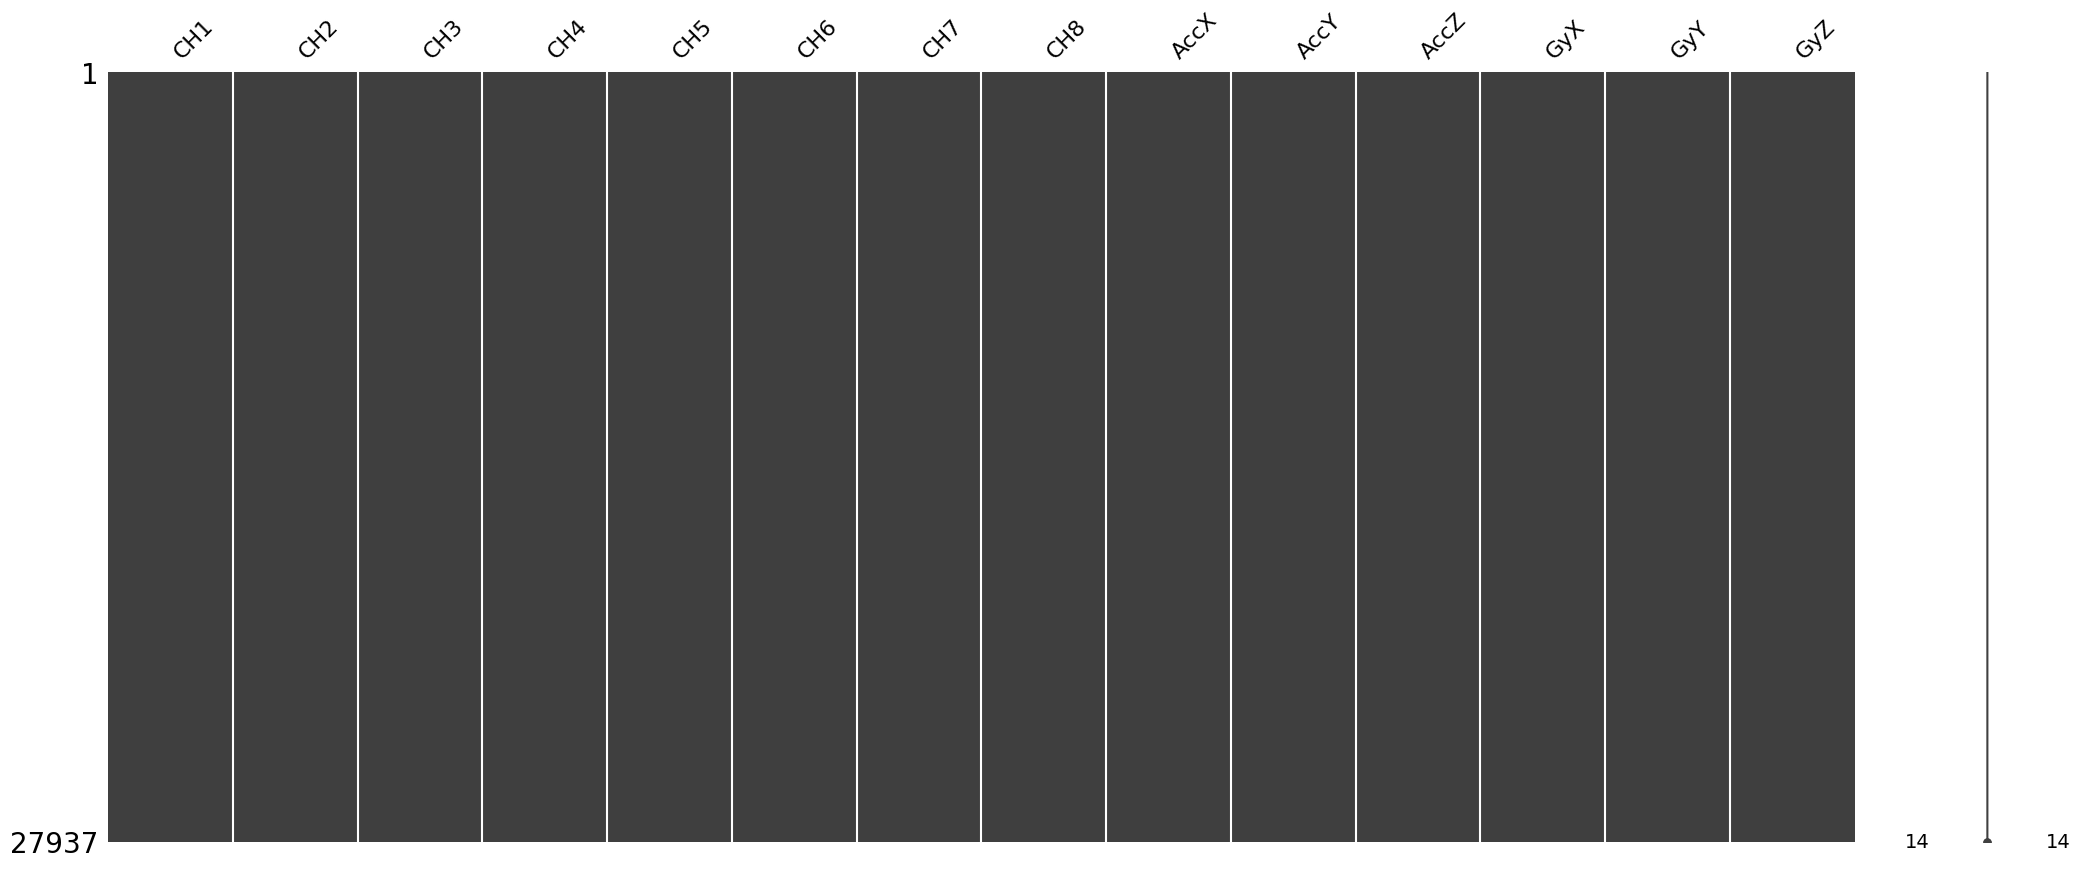

In [20]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

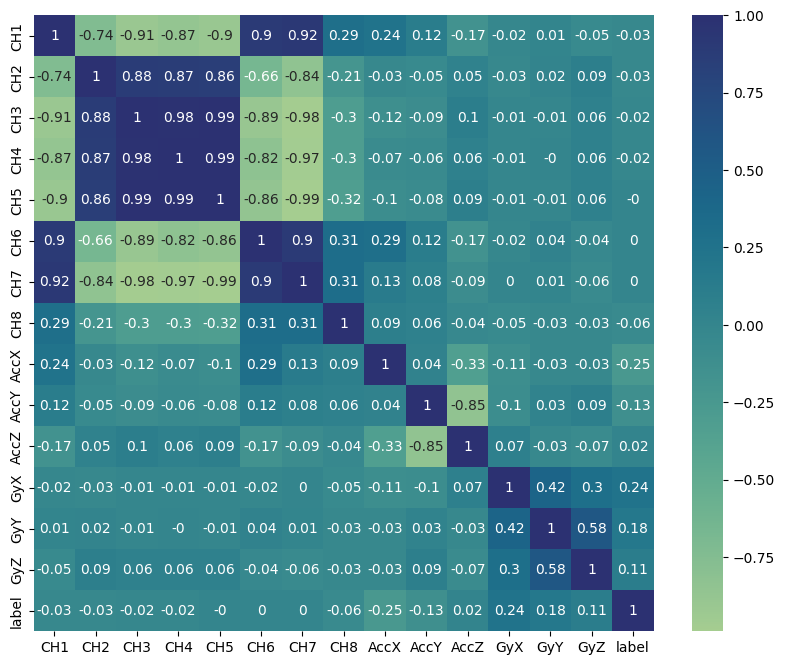

In [21]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3)

In [6]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [7]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [9]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [27]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [28]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 350, 400, 450, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [10, 25, 50, 75, 100, 125,
                                                      150, 200, 250, 300, 350,
                                                      400, 500]})

In [29]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
1,True,25,0.442504,0.152971
2,True,50,0.442146,0.149807
9,True,300,0.440150,0.134485
6,True,150,0.440099,0.137372
12,True,500,0.439792,0.135698


In [30]:
random_forest_grid.best_score_

0.4425044342496202

In [31]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 25}

In [32]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=25, random_state=33))])


In [33]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1198
           1       0.20      0.55      0.30      1196
           2       0.47      0.26      0.34      1196
           3       0.22      0.27      0.24      1196
           4       0.33      0.32      0.33      1196
           5       0.99      0.76      0.86      1203
           6       0.96      0.56      0.70      1197

    accuracy                           0.39      8382
   macro avg       0.45      0.39      0.40      8382
weighted avg       0.45      0.39      0.40      8382



In [35]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.3891672631830112


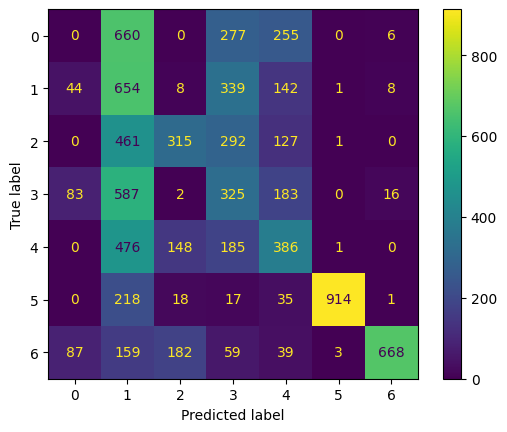

In [36]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [37]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [38]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [39]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
7,1,l2,saga,0.387992,0.103057,0.579227,0.013835
39,75,l2,saga,0.387583,0.102997,0.579789,0.013946
31,50,l2,saga,0.387583,0.102997,0.579764,0.013911
23,25,l2,saga,0.387583,0.102997,0.579738,0.013877
79,200,l2,saga,0.387532,0.102967,0.579789,0.013946


In [40]:
logistic_grid.best_params_

{'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}

In [41]:
logistic_grid.best_score_

0.3879919929964743

In [42]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=33, solver='saga'))])


In [43]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [ 1.06570019  1.13503274 -1.21266312  0.17163566 -0.119599   -0.76185024
 -0.27825623]
Coeficientes: [('CH1', 0.25903606175159183), ('CH2', 0.7248148547320746), ('CH3', -0.65471885148678), ('CH4', -0.436610116937805), ('CH5', -0.18532958431650443), ('CH6', 0.42625994378071297), ('CH7', -0.4083883166246614), ('CH8', -0.6783569219077238), ('AccX', -0.0075981212146153864), ('AccY', 0.08093727033405464), ('AccZ', 0.2084002002880648), ('GyX', -0.1788326780055465), ('GyY', -1.0085783814058242), ('GyZ', -1.1348573352204048), ('TimeStamp', 3.6511413056833857), ('label', 0.35885065514197373)]
Accuracy de test: 0.5134812693867812


In [44]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [45]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.43      0.59      0.50      1198
           1       0.29      0.82      0.43      1196
           2       0.76      0.56      0.65      1196
           3       0.25      0.10      0.14      1196
           4       0.04      0.00      0.00      1196
           5       0.99      0.81      0.89      1203
           6       0.90      0.71      0.79      1197

    accuracy                           0.51      8382
   macro avg       0.52      0.51      0.49      8382
weighted avg       0.52      0.51      0.49      8382



In [46]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.5134812693867812


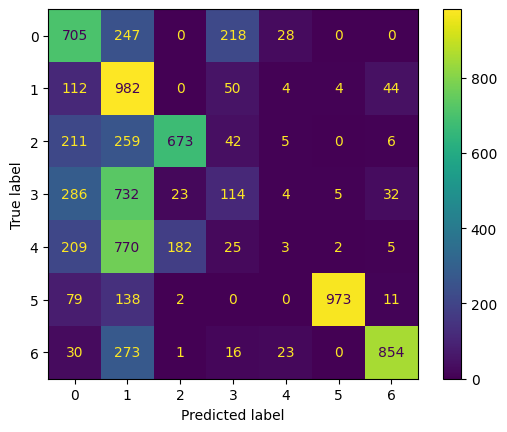

In [47]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [48]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [49]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [50]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
154,0,0.3,10,75,0.460363,0.129120,0.999949,0.000036
506,1,0.3,7,25,0.457193,0.140170,0.999847,0.000125
94,0,0.1,10,75,0.455645,0.122510,0.999847,0.000125
152,0,0.3,10,25,0.454528,0.141965,0.999923,0.000063
155,0,0.3,10,100,0.449568,0.129709,0.999923,0.000063


In [51]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.3,
 'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 75}

In [52]:
hist_gradient_grid.best_score_

0.46036327590022946

In [53]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.3, max_depth=10,
                                                max_iter=1000,
                                                max_leaf_nodes=75,
                                                n_iter_no_change=5,
             

In [54]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [55]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.01      0.00      0.00      1198
           1       0.34      0.30      0.32      1196
           2       0.39      0.42      0.40      1196
           3       0.19      0.52      0.28      1196
           4       0.39      0.26      0.31      1196
           5       0.99      0.77      0.87      1203
           6       0.85      0.60      0.70      1197

    accuracy                           0.41      8382
   macro avg       0.45      0.41      0.41      8382
weighted avg       0.45      0.41      0.41      8382



In [56]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.4099260319732761


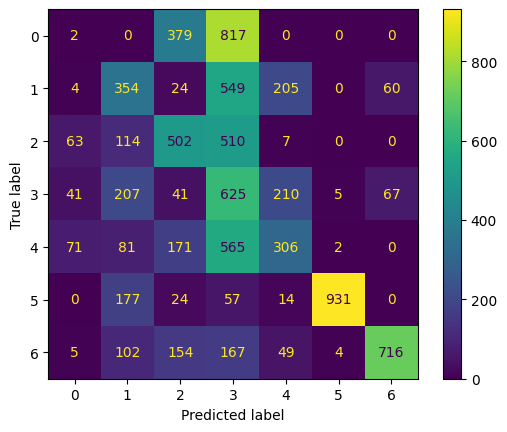

In [57]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [58]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [59]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callback...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9,
                                                       1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [60]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
234,0.1,25,156,0.1,0.474105,0.11626
294,0.1,75,156,0.1,0.474105,0.11626
324,0.1,100,156,0.1,0.474105,0.11626
264,0.1,50,156,0.1,0.474105,0.11626
103,0.1,9,226,0.3,0.473648,0.09774


In [61]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 25,
 'classifier__n_estimators': 156,
 'classifier__subsample': 0.1}

In [62]:
XGBoost_grid.best_score_

0.47410482586831765

In [63]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
             

In [64]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [65]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.29      0.17      0.22      1198
           1       0.26      0.20      0.22      1196
           2       0.10      0.05      0.07      1196
           3       0.17      0.61      0.27      1196
           4       0.29      0.01      0.02      1196
           5       0.99      0.77      0.87      1203
           6       0.95      0.69      0.80      1197

    accuracy                           0.36      8382
   macro avg       0.44      0.36      0.35      8382
weighted avg       0.44      0.36      0.35      8382



In [66]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.3581484132665235


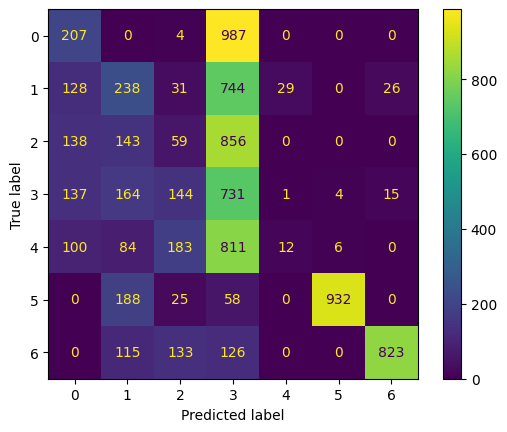

In [67]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [68]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [69]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 19555, number of used features: 14
[LightGBM] [Info] Start training from score -1.946115
[LightGBM] [Info] Start training from score -1.945399
[LightGBM] [Info] Start training from score -1.946831
[LightGBM] [Info] Start training from score -1.945041
[LightGBM] [Info] Start training from score -1.946115
[LightGBM] [Info] Start training from score -1.946115
[LightGBM] [Info] Start training from score -1.945757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C06AB2E750>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [70]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
487,gbdt,True,0.3,10,35,25,0.3,0.459881,0.140389,1.0,0.0
344,gbdt,True,0.1,50,493,25,0.5,0.458877,0.110059,1.0,0.0
173,gbdt,True,0.1,50,333,25,0.9,0.457954,0.107064,1.0,0.0
312,gbdt,True,0.1,100,280,25,0.3,0.457238,0.107249,1.0,0.0
123,gbdt,True,0.5,10,442,25,0.7,0.456939,0.134624,1.0,0.0


In [71]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.3,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 35,
 'classifier__num_leaves': 25,
 'classifier__subsample': 0.3}

In [72]:
light_grid.best_score_

0.4598813258195664

In [73]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.3,
                                max_depth=10, n_estimators=35, num_leaves=25,
                                random_state=33, subsample=0.3))])


In [74]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [75]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1198
           1       0.30      0.29      0.30      1196
           2       0.40      0.40      0.40      1196
           3       0.20      0.47      0.28      1196
           4       0.28      0.32      0.30      1196
           5       1.00      0.75      0.86      1203
           6       0.97      0.64      0.77      1197

    accuracy                           0.41      8382
   macro avg       0.45      0.41      0.42      8382
weighted avg       0.45      0.41      0.42      8382



In [76]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.41183488427582915


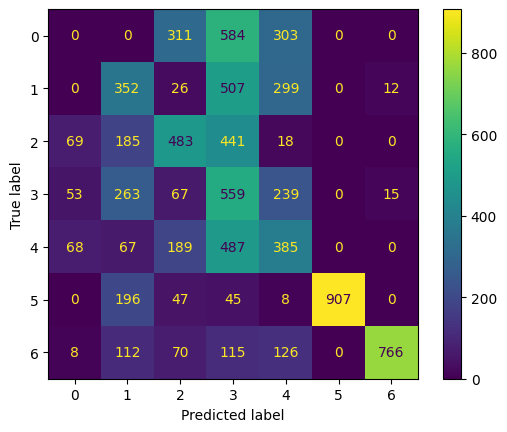

In [77]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [78]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [79]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [80]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
7,1,0.01,rbf,0.423231,0.091680
55,50,0.01,rbf,0.417952,0.095066
71,75,0.01,rbf,0.411711,0.097374
1,1,scale,rbf,0.409827,0.124224
37,25,0.001,rbf,0.406495,0.087209


In [81]:
svm_grid.best_params_

{'classifier__C': 1, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

In [82]:
svm_grid.best_score_

0.4232308646762534

In [83]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=1, gamma=0.01))])


In [84]:
modelo_final_svm = svm_grid.best_estimator_

In [85]:
y_test_pred = modelo_final_svm.predict(x_test)

In [86]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.32      0.39      0.35      1198
           1       0.31      0.26      0.28      1196
           2       0.33      0.14      0.19      1196
           3       0.24      0.55      0.34      1196
           4       0.23      0.14      0.18      1196
           5       0.95      0.79      0.87      1203
           6       0.88      0.72      0.79      1197

    accuracy                           0.43      8382
   macro avg       0.47      0.43      0.43      8382
weighted avg       0.47      0.43      0.43      8382



In [87]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.4269863994273443


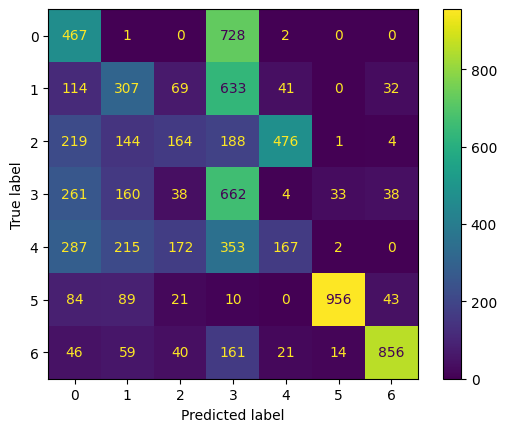

In [88]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [89]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [90]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [91]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
126,0.1,0.01,invscaling,log_loss,elasticnet,0.422258,0.039632
48,0.1,0.001,invscaling,modified_huber,l1,0.419447,0.020813
52,0.1,0.001,invscaling,squared_hinge,l1,0.418679,0.020431
248,0.01,0.001,constant,modified_huber,l1,0.418672,0.088942
364,0.01,0.01,invscaling,log_loss,l1,0.415955,0.068367


In [92]:
sgd_grid.best_params_

{'classifier__alpha': 0.1,
 'classifier__eta0': 0.01,
 'classifier__learning_rate': 'invscaling',
 'classifier__loss': 'log_loss',
 'classifier__penalty': 'elasticnet'}

In [93]:
sgd_grid.best_score_

0.4222582602906571

In [94]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.1, eta0=0.01, learning_rate='invscaling',
                               loss='log_loss', penalty='elasticnet'))])


In [95]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [96]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.31      0.76      0.44      1198
           1       0.33      0.09      0.15      1196
           2       0.67      0.24      0.36      1196
           3       0.16      0.19      0.17      1196
           4       0.20      0.01      0.01      1196
           5       0.95      0.79      0.86      1203
           6       0.46      0.85      0.59      1197

    accuracy                           0.42      8382
   macro avg       0.44      0.42      0.37      8382
weighted avg       0.44      0.42      0.37      8382



In [97]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.4195895967549511


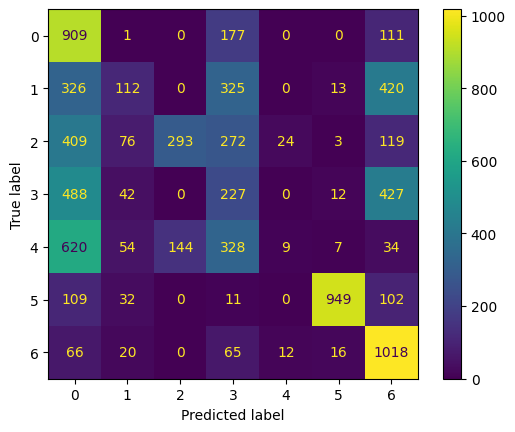

In [98]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

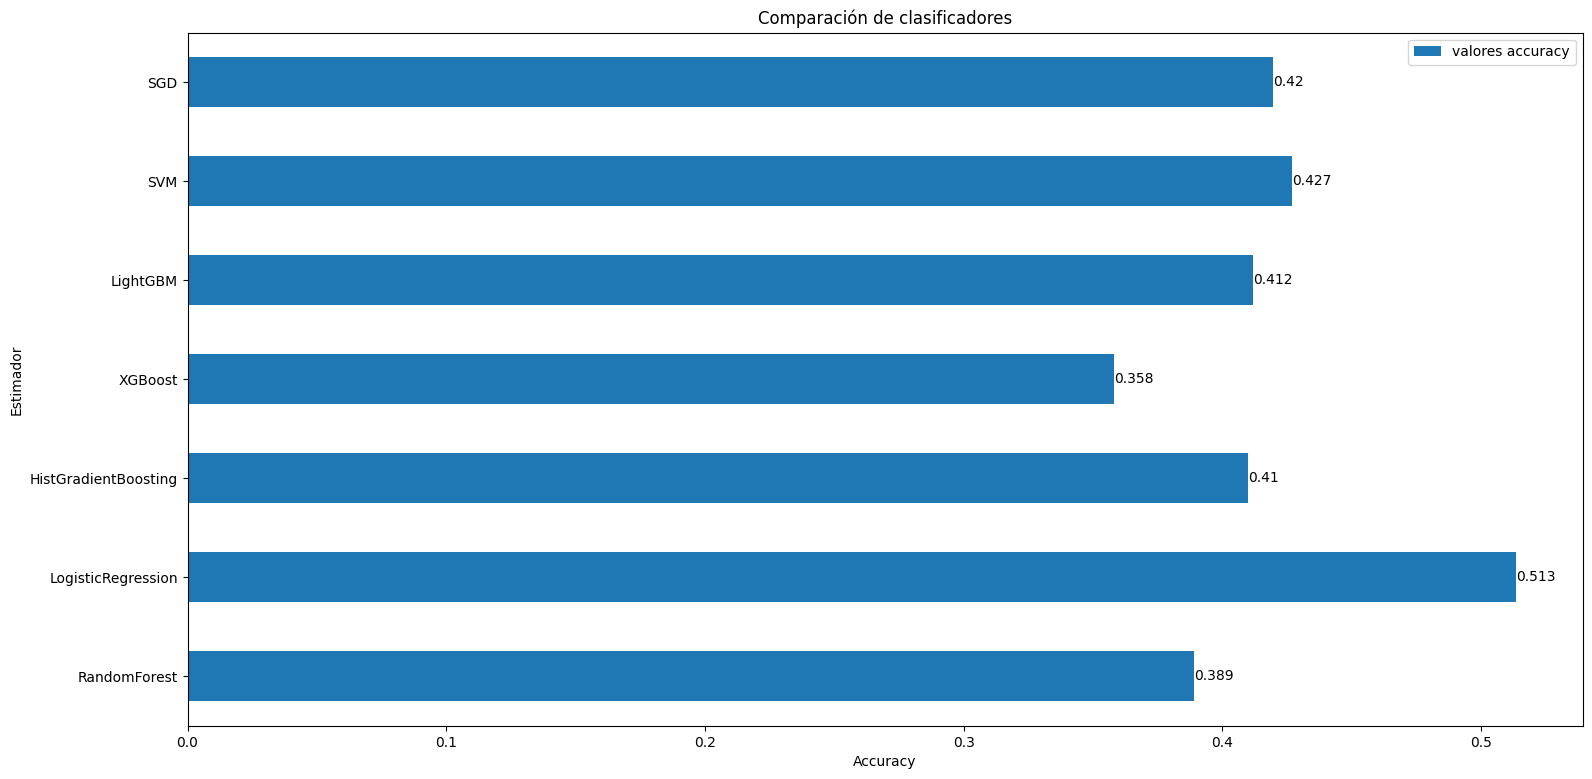

In [4]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`. 

In [12]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [19]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.1,
        eta0 = 0.01,
        learning_rate = 'invscaling',
        loss = 'log_loss',
        penalty = 'elasticnet'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSA/modelo_SGD.pkl', 'wb'))

In [13]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 25
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSA/modelo_RF.pkl', 'wb'))

In [18]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 1,
        gamma = 0.01,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSA/modelo_SVM.pkl', 'wb'))

In [14]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 1,
        penalty = 'l2',
        solver = 'saga',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSA/modelo_LR.pkl', 'wb'))

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.3,
        max_depth = 10,
        max_leaf_nodes = 75         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSA/modelo_HIST.pkl', 'wb'))

In [16]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.1,
        max_depth = 25,
        n_estimators = 156,
        subsample = 0.1        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSA/modelo_XGB.pkl', 'wb'))

In [17]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.3,
        max_depth = 10,
        n_estimators = 35,
        num_leaves = 25,
        subsample = 0.3      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSA/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 19555, number of used features: 14
[LightGBM] [Info] Start training from score -1.946115
[LightGBM] [Info] Start training from score -1.945399
[LightGBM] [Info] Start training from score -1.946831
[LightGBM] [Info] Start training from score -1.945041
[LightGBM] [Info] Start training from score -1.946115
[LightGBM] [Info] Start training from score -1.946115
[LightGBM] [Info] Start training from score -1.945757
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# DATOS 0.01 FWSA SHUFFLE

In [128]:
path = "data_train_fwsa.csv"

df = pd.read_csv(path)

In [129]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [130]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,16894.783060,8394.209569,1541.817458,9705.996237,5835.197735,11758.448665,13803.997268,8299.930528,114.132592,180.855416,130.961320,0.002710,0.005518,0.001550,51:24.669019,4
1,16895.135555,8388.254882,1549.776201,9715.742525,5846.353829,11753.981261,13819.443554,8299.700019,114.053240,180.708920,131.022360,0.002441,0.006592,0.000671,51:24.677095,4
2,16883.564814,8386.133672,1554.451598,9718.992102,5847.660527,11752.169806,13810.385013,8285.086960,114.144800,180.562424,130.976580,0.001160,0.003845,0.000342,51:24.688970,4
3,16873.149618,8358.569671,1580.073708,9747.028282,5879.601490,11730.975972,13828.076059,8282.567192,114.205840,180.464760,130.946060,0.000305,0.002014,0.000122,51:24.697002,4
4,16887.720283,8382.018719,1553.996944,9717.122234,5845.097168,11744.470780,13796.563027,8288.682662,114.269932,180.913404,130.799564,0.001074,0.002161,0.000708,51:24.713472,4


In [131]:
print(df.shape)

(27937, 16)


Obtenemos el número de gestos realizados, `label`

In [132]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 7



0. Reposo
1. Puño
2. Palma
3. Flexión
4. Extensión
5. Pronación
6. Supinación

Observamos que tipos de datos tenemos en cada columna de la base de datos

In [133]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [134]:
X_df = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

In [135]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
0,16894.783060,8394.209569,1541.817458,9705.996237,5835.197735,11758.448665,13803.997268,8299.930528,114.132592,180.855416,130.961320,0.002710,0.005518,0.001550
1,16895.135555,8388.254882,1549.776201,9715.742525,5846.353829,11753.981261,13819.443554,8299.700019,114.053240,180.708920,131.022360,0.002441,0.006592,0.000671
2,16883.564814,8386.133672,1554.451598,9718.992102,5847.660527,11752.169806,13810.385013,8285.086960,114.144800,180.562424,130.976580,0.001160,0.003845,0.000342
3,16873.149618,8358.569671,1580.073708,9747.028282,5879.601490,11730.975972,13828.076059,8282.567192,114.205840,180.464760,130.946060,0.000305,0.002014,0.000122
4,16887.720283,8382.018719,1553.996944,9717.122234,5845.097168,11744.470780,13796.563027,8288.682662,114.269932,180.913404,130.799564,0.001074,0.002161,0.000708


In [136]:
y_df.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [137]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
count,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000,27937.000000
mean,9629.629586,9350.290480,6079.834317,12013.925913,10641.696589,8923.632203,10245.702971,6032.960602,67.993819,157.286393,168.952467,0.050205,0.017519,0.017962
std,6558.296570,1935.938281,5325.987396,4153.184079,6907.040209,2422.900511,4795.935321,10959.198703,35.006144,42.032318,37.929627,0.132819,0.031026,0.030708
min,354.299799,5355.120859,5.929121,5167.055841,853.946286,3657.601017,4406.578180,14.790572,0.015260,0.244160,7.996240,0.000000,0.000000,0.000000
25%,3765.528572,7677.845250,676.017500,8004.464668,3802.763298,7035.599530,5317.598947,1590.315539,41.092128,150.256064,144.390120,0.006567,0.003601,0.004114
50%,13107.560789,9328.319688,9261.999172,12792.053532,14406.523473,8106.498905,7228.313978,4513.940510,65.541700,164.762220,172.636380,0.014587,0.008118,0.009033
75%,15111.028793,10877.528705,11166.787181,16260.374918,17249.322599,11057.150126,15276.276872,5918.537545,90.894664,177.244900,188.033720,0.032959,0.018616,0.019836
max,42554.670384,13503.949547,13973.110493,19464.860738,20166.452245,13272.845582,17054.049164,114296.121917,158.642960,261.068080,261.388540,1.842341,0.542967,0.767393


Observamos si las salidas estan balanceadas

In [138]:
y_df.value_counts()

label
5    3996
3    3992
0    3991
1    3991
6    3991
4    3989
2    3987
Name: count, dtype: int64

Observamos si hay valores nulos

In [139]:
X_df.isnull().any()

CH1     False
CH2     False
CH3     False
CH4     False
CH5     False
CH6     False
CH7     False
CH8     False
AccX    False
AccY    False
AccZ    False
GyX     False
GyY     False
GyZ     False
dtype: bool

In [140]:
X_df.isnull().sum()

CH1     0
CH2     0
CH3     0
CH4     0
CH5     0
CH6     0
CH7     0
CH8     0
AccX    0
AccY    0
AccZ    0
GyX     0
GyY     0
GyZ     0
dtype: int64

In [141]:
X_df.isnull().sum() / len(X_df) * 100

CH1     0.0
CH2     0.0
CH3     0.0
CH4     0.0
CH5     0.0
CH6     0.0
CH7     0.0
CH8     0.0
AccX    0.0
AccY    0.0
AccZ    0.0
GyX     0.0
GyY     0.0
GyZ     0.0
dtype: float64

In [142]:
y_df.isnull().any()

False

In [143]:
y_df.isnull().sum()

0

In [144]:
y_df.isnull().sum() / len(y_df) * 100

0.0

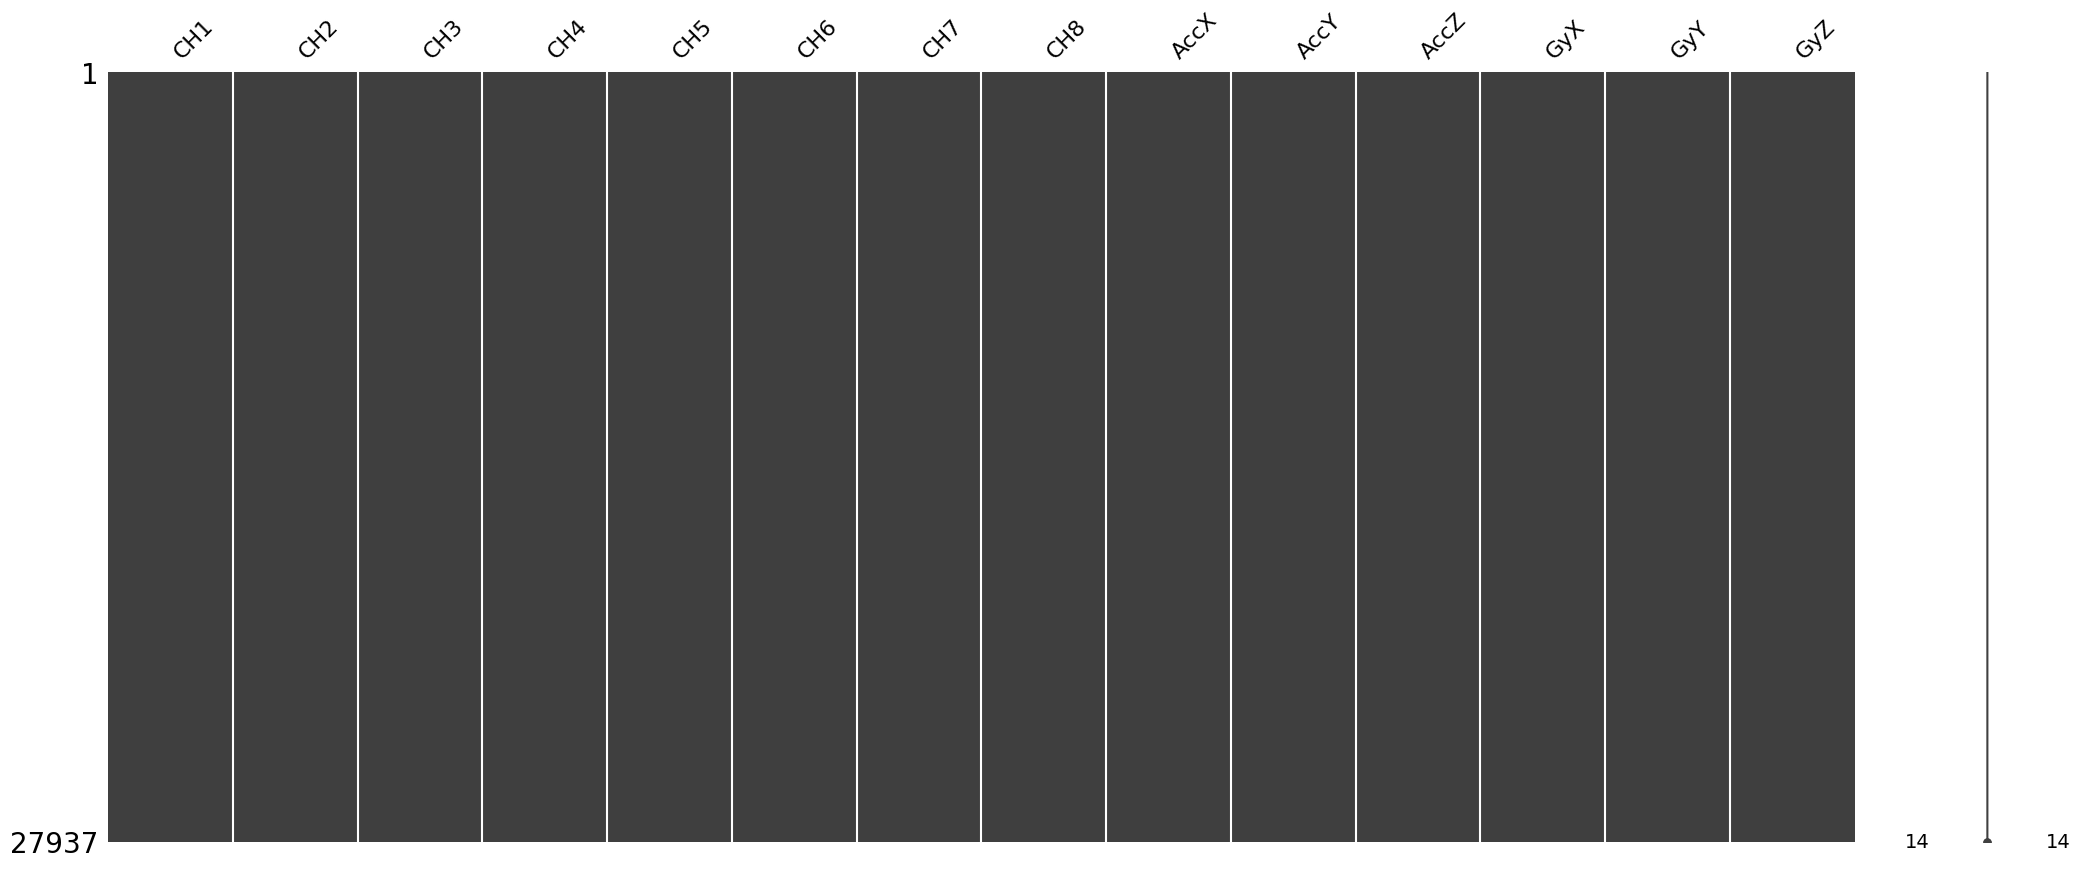

In [145]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

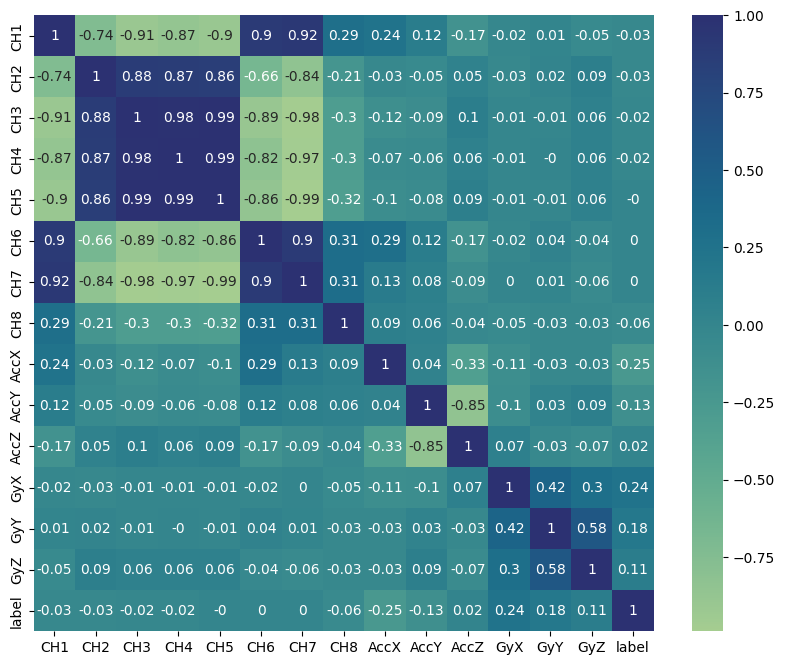

In [146]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=True, test_size=0.2)

In [21]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [22]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [24]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [152]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [153]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 350, 400, 450, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [10, 25, 50, 75, 100, 125,
                                                      150, 200, 250, 300, 350,
                                                      400, 500]})

In [154]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
11,True,400,0.995449,0.000402
10,True,350,0.995346,0.000440
4,True,100,0.995346,0.000192
12,True,500,0.995295,0.000440
8,True,250,0.995295,0.000072


In [155]:
random_forest_grid.best_score_

0.995448752619839

In [156]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 400}

In [157]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, random_state=33))])


In [158]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [159]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1187
           1       1.00      1.00      1.00      1159
           2       1.00      1.00      1.00      1258
           3       1.00      1.00      1.00      1231
           4       1.00      1.00      1.00      1173
           5       1.00      1.00      1.00      1156
           6       1.00      1.00      1.00      1218

    accuracy                           1.00      8382
   macro avg       1.00      1.00      1.00      8382
weighted avg       1.00      1.00      1.00      8382



In [160]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.998329754235266


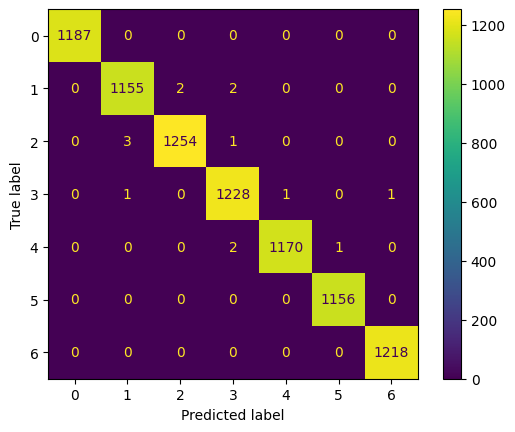

In [161]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [162]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [163]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [164]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
20,25,l2,newton-cg,0.571866,0.003110,0.574925,0.003605
28,50,l2,newton-cg,0.571761,0.002428,0.574644,0.003137
36,75,l2,newton-cg,0.571657,0.001849,0.574465,0.003144
44,100,l2,newton-cg,0.571609,0.001996,0.574569,0.003315
60,150,l2,newton-cg,0.571606,0.001836,0.574363,0.003278


In [165]:
logistic_grid.best_params_

{'classifier__C': 25,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [166]:
logistic_grid.best_score_

0.571865735004628

In [167]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=25, class_weight='balanced',
                                    random_state=33, solver='newton-cg'))])


In [168]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [-2.00997264  1.77308297  1.87305638 -1.99516976 -0.61957941  0.56904876
  0.4095337 ]
Coeficientes: [('CH1', -2.969992123907931), ('CH2', 3.0469731059759724), ('CH3', -10.792282893087762), ('CH4', 0.40574300546400205), ('CH5', 4.25505538707416), ('CH6', -0.7386673097476086), ('CH7', 1.2891507951707908), ('CH8', -0.8162173357130682), ('AccX', 0.3008395582866056), ('AccY', -0.14547661974674553), ('AccZ', -0.563580911217028), ('GyX', -0.37268706009238517), ('GyY', -0.8580048702008827), ('GyZ', -1.0391497045726765), ('TimeStamp', 3.8941874724371646), ('label', -0.8623210920193579)]
Accuracy de test: 0.5758768790264853


In [169]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [170]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.45      0.78      0.57      1187
           1       0.46      0.43      0.44      1159
           2       0.68      0.48      0.56      1258
           3       0.45      0.41      0.43      1231
           4       0.40      0.33      0.36      1173
           5       0.88      0.84      0.86      1156
           6       0.81      0.78      0.79      1218

    accuracy                           0.58      8382
   macro avg       0.59      0.58      0.57      8382
weighted avg       0.59      0.58      0.57      8382



In [171]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.5758768790264853


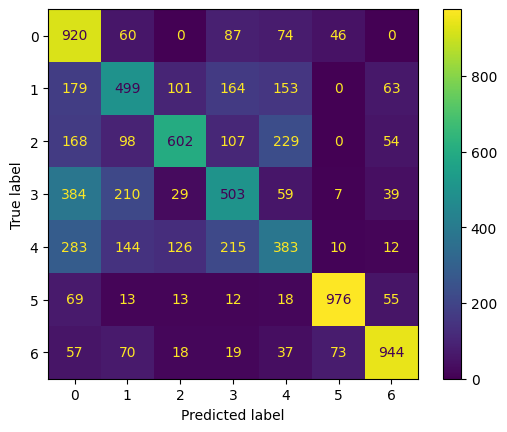

In [172]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [173]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [174]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [175]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
122,0,0.3,None,25,0.997443,0.000647,0.999669,0.000095
176,0,0.3,100,25,0.997443,0.000647,0.999669,0.000095
170,0,0.3,75,25,0.997443,0.000647,0.999669,0.000095
164,0,0.3,50,25,0.997443,0.000647,0.999669,0.000095
158,0,0.3,25,25,0.997443,0.000647,0.999669,0.000095


In [176]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.3,
 'classifier__max_depth': None,
 'classifier__max_leaf_nodes': 25}

In [177]:
hist_gradient_grid.best_score_

0.9974429256122331

In [178]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.3,
                                                max_iter=1000,
                                                max_leaf_nodes=25,
                                                n_iter_no_change=5,
                           

In [179]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [180]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1187
           1       1.00      1.00      1.00      1159
           2       1.00      1.00      1.00      1258
           3       1.00      1.00      1.00      1231
           4       1.00      1.00      1.00      1173
           5       1.00      1.00      1.00      1156
           6       1.00      1.00      1.00      1218

    accuracy                           1.00      8382
   macro avg       1.00      1.00      1.00      8382
weighted avg       1.00      1.00      1.00      8382



In [181]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.9984490575041756


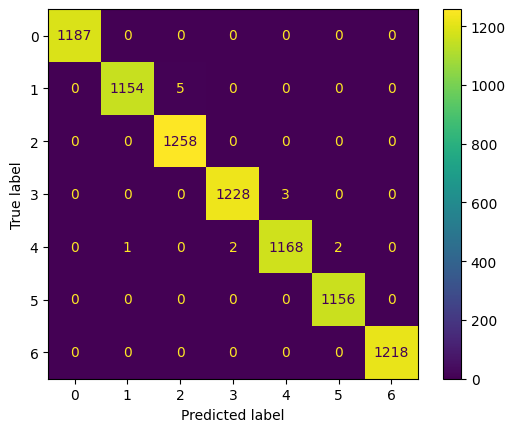

In [182]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [183]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [184]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callback...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9,
                                                       1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [185]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
748,0.5,7,156,0.9,0.997090,0.001195
341,0.3,3,401,1,0.997033,0.000923
736,0.5,7,226,0.9,0.996989,0.001278
795,0.5,11,226,0.7,0.996982,0.001090
807,0.5,11,156,0.7,0.996981,0.001051


In [186]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 156,
 'classifier__subsample': 0.9}

In [187]:
XGBoost_grid.best_score_

0.9970904555402074

In [188]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
             

In [189]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [190]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1187
           1       1.00      0.99      1.00      1159
           2       0.99      1.00      1.00      1258
           3       1.00      1.00      1.00      1231
           4       1.00      1.00      1.00      1173
           5       1.00      1.00      1.00      1156
           6       1.00      1.00      1.00      1218

    accuracy                           1.00      8382
   macro avg       1.00      1.00      1.00      8382
weighted avg       1.00      1.00      1.00      8382



In [191]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.9980911476974469


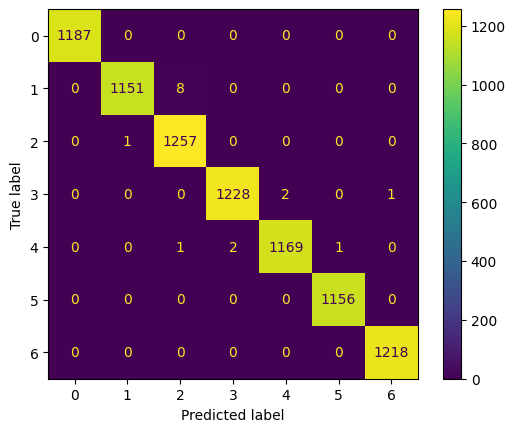

In [192]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [193]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [194]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 19555, number of used features: 14
[LightGBM] [Info] Start training from score -1.942184
[LightGBM] [Info] Start training from score -1.932248
[LightGBM] [Info] Start training from score -1.969296
[LightGBM] [Info] Start training from score -1.957638
[LightGBM] [Info] Start training from score -1.937914
[LightGBM] [Info] Start training from score -1.929427
[LightGBM] [Info] Start training from score -1.953301
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C003456DD0>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [195]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
225,gbdt,True,0.3,25,432,25,0.5,0.997548,0.000875,1.0,0.0
344,gbdt,True,0.1,50,493,25,0.5,0.997495,0.000685,1.0,0.0
336,gbdt,True,0.3,50,445,7,0.7,0.997438,0.000720,1.0,0.0
260,gbdt,True,0.3,100,299,25,0.5,0.997397,0.000864,1.0,0.0
479,gbdt,True,0.3,25,85,25,0.7,0.997396,0.000757,1.0,0.0


In [196]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.3,
 'classifier__max_depth': 25,
 'classifier__n_estimators': 432,
 'classifier__num_leaves': 25,
 'classifier__subsample': 0.5}

In [197]:
light_grid.best_score_

0.9975479642793799

In [198]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.3,
                                max_depth=25, n_estimators=432, num_leaves=25,
                                random_state=33, subsample=0.5))])


In [199]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [200]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1187
           1       1.00      0.99      1.00      1159
           2       0.99      1.00      1.00      1258
           3       1.00      1.00      1.00      1231
           4       1.00      1.00      1.00      1173
           5       1.00      1.00      1.00      1156
           6       1.00      1.00      1.00      1218

    accuracy                           1.00      8382
   macro avg       1.00      1.00      1.00      8382
weighted avg       1.00      1.00      1.00      8382



In [201]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.9984490575041756


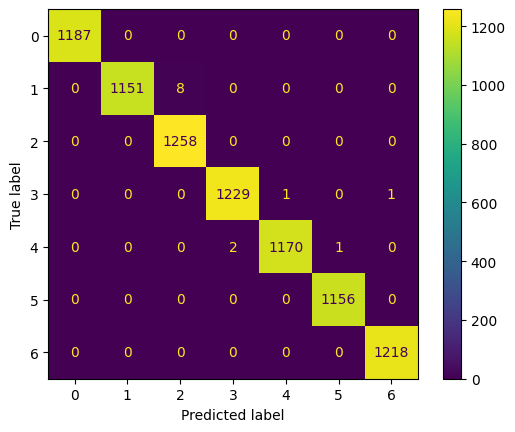

In [202]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [203]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [204]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [205]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
153,200,0.1,rbf,0.961531,0.002368
137,175,0.1,rbf,0.960148,0.002391
121,150,0.1,rbf,0.958416,0.002669
147,200,auto,rbf,0.957618,0.000736
105,125,0.1,rbf,0.957324,0.002283


In [206]:
svm_grid.best_params_

{'classifier__C': 200, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}

In [207]:
svm_grid.best_score_

0.9615307596305803

In [208]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=200, gamma=0.1))])


In [209]:
modelo_final_svm = svm_grid.best_estimator_

In [210]:
y_test_pred = modelo_final_svm.predict(x_test)

In [211]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1187
           1       0.96      0.97      0.96      1159
           2       0.98      0.97      0.97      1258
           3       0.95      0.97      0.96      1231
           4       0.98      0.95      0.96      1173
           5       0.99      0.99      0.99      1156
           6       0.99      0.99      0.99      1218

    accuracy                           0.98      8382
   macro avg       0.98      0.98      0.98      8382
weighted avg       0.98      0.98      0.98      8382



In [212]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.9764972560248151


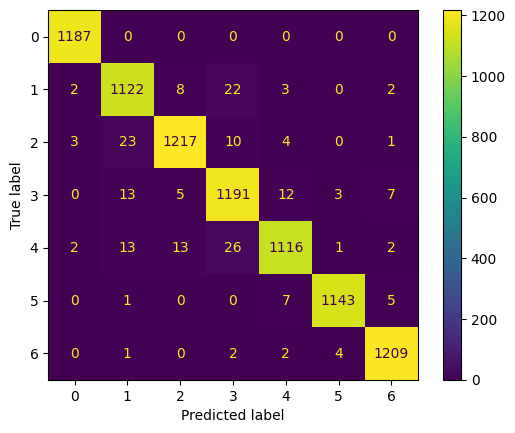

In [213]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [214]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [215]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [216]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
944,0.0001,0.1,adaptive,log_loss,l1,0.561360,0.002840
1184,0.00001,0.1,adaptive,log_loss,l1,0.560396,0.000389
1185,0.00001,0.1,adaptive,log_loss,l2,0.558931,0.000577
947,0.0001,0.1,adaptive,log_loss,None,0.558806,0.002696
1186,0.00001,0.1,adaptive,log_loss,elasticnet,0.558362,0.001624


In [217]:
sgd_grid.best_params_

{'classifier__alpha': 0.0001,
 'classifier__eta0': 0.1,
 'classifier__learning_rate': 'adaptive',
 'classifier__loss': 'log_loss',
 'classifier__penalty': 'l1'}

In [218]:
sgd_grid.best_score_

0.5613601216461328

In [219]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(eta0=0.1, learning_rate='adaptive',
                               loss='log_loss', penalty='l1'))])


In [220]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [221]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.44      0.78      0.56      1187
           1       0.46      0.40      0.42      1159
           2       0.69      0.52      0.59      1258
           3       0.44      0.38      0.41      1231
           4       0.37      0.29      0.33      1173
           5       0.84      0.84      0.84      1156
           6       0.77      0.77      0.77      1218

    accuracy                           0.57      8382
   macro avg       0.57      0.57      0.56      8382
weighted avg       0.57      0.57      0.56      8382



In [222]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.5669291338582677


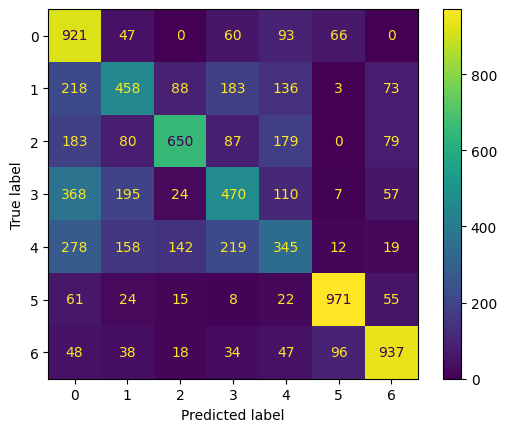

In [223]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

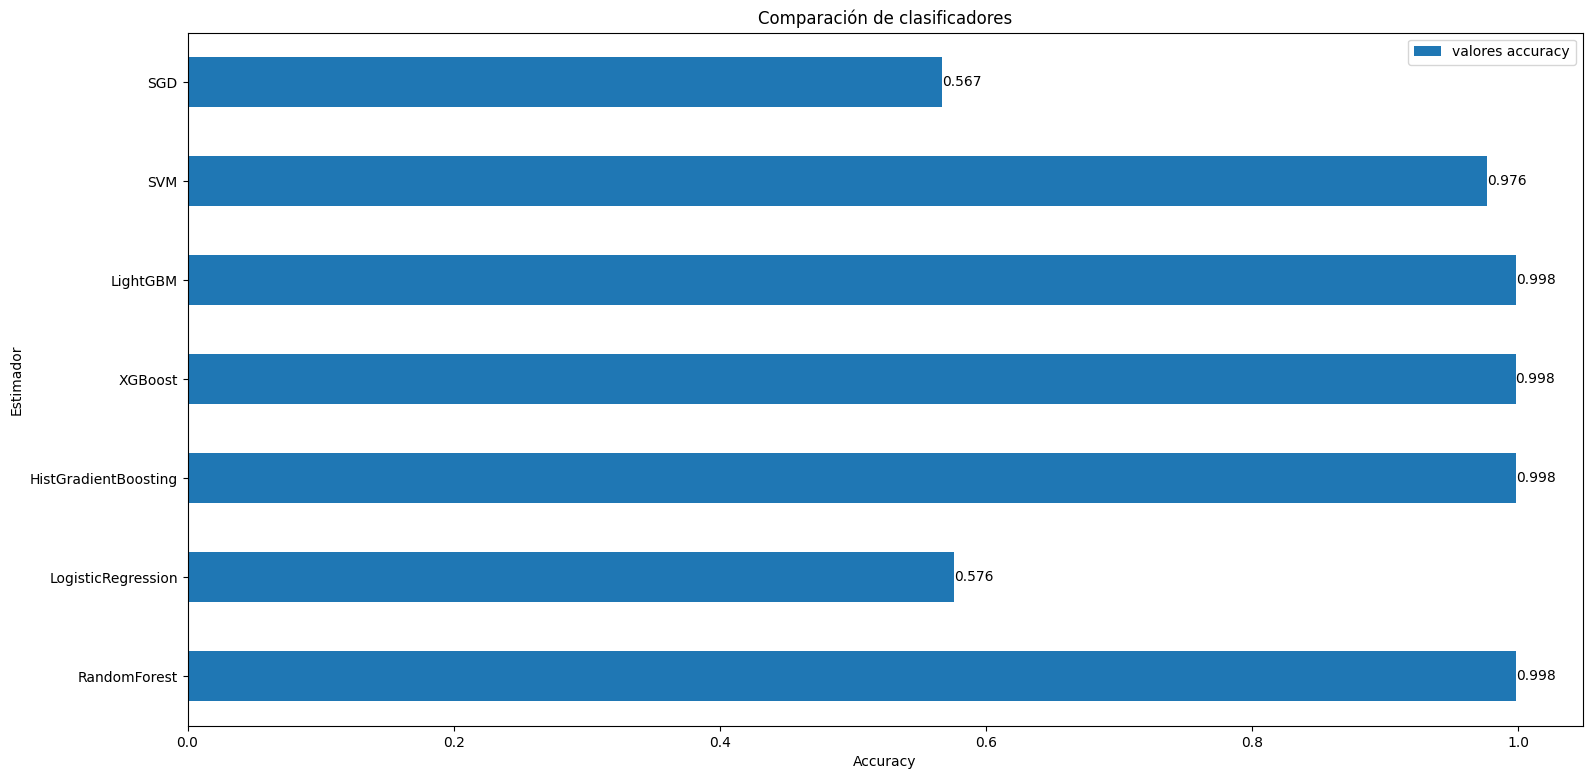

In [3]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`. 

In [25]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [32]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.0001,
        eta0 = 0.1,
        learning_rate = 'adaptive',
        loss = 'log_loss',
        penalty = 'l1'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSAs/modelo_SGD.pkl', 'wb'))

In [26]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 400
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSAs/modelo_RF.pkl', 'wb'))

In [31]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 200,
        gamma = 0.1,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSAs/modelo_SVM.pkl', 'wb'))

In [27]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 25,
        penalty = 'l2',
        solver = 'newton-cg',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSAs/modelo_LR.pkl', 'wb'))

In [28]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.3,
        max_depth = None,
        max_leaf_nodes = 25         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSAs/modelo_HIST.pkl', 'wb'))

In [29]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.5,
        max_depth = 7,
        n_estimators = 156,
        subsample = 0.9        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSAs/modelo_XGB.pkl', 'wb'))

In [ ]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.3,
        max_depth = 25,
        n_estimators = 432,
        num_leaves = 25,
        subsample = 0.5      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/FWSAs/modelo_LGBMC.pkl', 'wb'))

# DATOS 0.01 RWA

In [33]:
path = "data_train_rwa.csv"

df = pd.read_csv(path)

In [34]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [255]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,10536.664923,4263.490413,7436.111139,11794.433869,4457.514961,8616.294682,13678.553942,4965.439639,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634,01:08.958213,4
1,10673.660915,4222.669175,7491.423311,11850.392593,4481.451889,8752.567658,13661.008614,4886.074993,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634,01:08.960366,4
2,10674.627895,4227.769973,7485.470363,11837.851692,4476.880669,8773.085499,13659.317271,4866.920212,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634,01:08.964712,4
3,10535.087438,4285.281235,7415.160516,11764.981423,4439.544186,8656.867029,13678.294259,4904.575401,52.924732,169.379896,181.465816,0.028320,0.016528,0.016150,01:08.970603,4
4,10455.772705,4327.317894,7368.955824,11719.944850,4410.664703,8576.230120,13688.925013,4937.993905,53.095644,170.258872,180.879832,0.025635,0.017554,0.019665,01:08.972413,4


In [256]:
print(df.shape)

(52885, 16)


Obtenemos el número de gestos realizados, `label`

In [257]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 7



0. Reposo
1. Puño
2. Palma
3. Flexión
4. Extensión
5. Pronación
6. Supinación

Observamos que tipos de datos tenemos en cada columna de la base de datos

In [258]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [35]:
X_df = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

In [260]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
0,10536.664923,4263.490413,7436.111139,11794.433869,4457.514961,8616.294682,13678.553942,4965.439639,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634
1,10673.660915,4222.669175,7491.423311,11850.392593,4481.451889,8752.567658,13661.008614,4886.074993,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634
2,10674.627895,4227.769973,7485.470363,11837.851692,4476.880669,8773.085499,13659.317271,4866.920212,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634
3,10535.087438,4285.281235,7415.160516,11764.981423,4439.544186,8656.867029,13678.294259,4904.575401,52.924732,169.379896,181.465816,0.028320,0.016528,0.016150
4,10455.772705,4327.317894,7368.955824,11719.944850,4410.664703,8576.230120,13688.925013,4937.993905,53.095644,170.258872,180.879832,0.025635,0.017554,0.019665


In [261]:
y_df.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [262]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
count,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000
mean,7072.550257,7221.187163,9163.403223,14826.422186,12092.132332,8665.496163,9886.550148,5127.075567,42.005234,162.208502,176.783953,0.043154,0.016185,0.015324
std,5068.757324,3138.863602,3733.226884,4422.563540,7721.229240,2086.725776,4065.112968,9305.298888,17.183284,43.353122,31.203526,0.104057,0.025786,0.019678
min,43.792604,30.424074,866.994013,5558.301286,6.546027,5813.423923,4614.111467,6.744854,0.000000,0.335720,80.206560,0.000000,0.000000,0.000000
25%,2770.876645,6366.099664,6046.606230,10335.074983,3241.134594,6871.539686,6605.382017,1641.184101,31.466120,154.339640,164.975860,0.006348,0.003723,0.003784
50%,4196.465784,7606.555650,9850.110681,15926.581512,14754.842676,7874.840387,8889.861333,2806.061735,43.814512,169.675940,177.464644,0.014087,0.008130,0.008533
75%,11413.528817,8396.411802,11481.867958,18913.870943,19800.440825,10155.967743,13868.945564,5502.652817,54.539240,184.996980,190.490580,0.032129,0.016785,0.018701
max,29958.314069,14880.707441,15910.367696,21094.728955,23269.978628,13779.479405,17342.502960,91528.413685,78.131200,243.183360,257.695620,1.581173,0.357848,0.328612


Observamos si las salidas estan balanceadas

In [263]:
y_df.value_counts()

label
4    7872
2    7738
1    7583
5    7574
0    7549
6    7478
3    7091
Name: count, dtype: int64

Observamos si hay valores nulos

In [264]:
X_df.isnull().any()

CH1     False
CH2     False
CH3     False
CH4     False
CH5     False
CH6     False
CH7     False
CH8     False
AccX    False
AccY    False
AccZ    False
GyX     False
GyY     False
GyZ     False
dtype: bool

In [265]:
X_df.isnull().sum()

CH1     0
CH2     0
CH3     0
CH4     0
CH5     0
CH6     0
CH7     0
CH8     0
AccX    0
AccY    0
AccZ    0
GyX     0
GyY     0
GyZ     0
dtype: int64

In [266]:
X_df.isnull().sum() / len(X_df) * 100

CH1     0.0
CH2     0.0
CH3     0.0
CH4     0.0
CH5     0.0
CH6     0.0
CH7     0.0
CH8     0.0
AccX    0.0
AccY    0.0
AccZ    0.0
GyX     0.0
GyY     0.0
GyZ     0.0
dtype: float64

In [267]:
y_df.isnull().any()

False

In [268]:
y_df.isnull().sum()

0

In [269]:
y_df.isnull().sum() / len(y_df) * 100

0.0

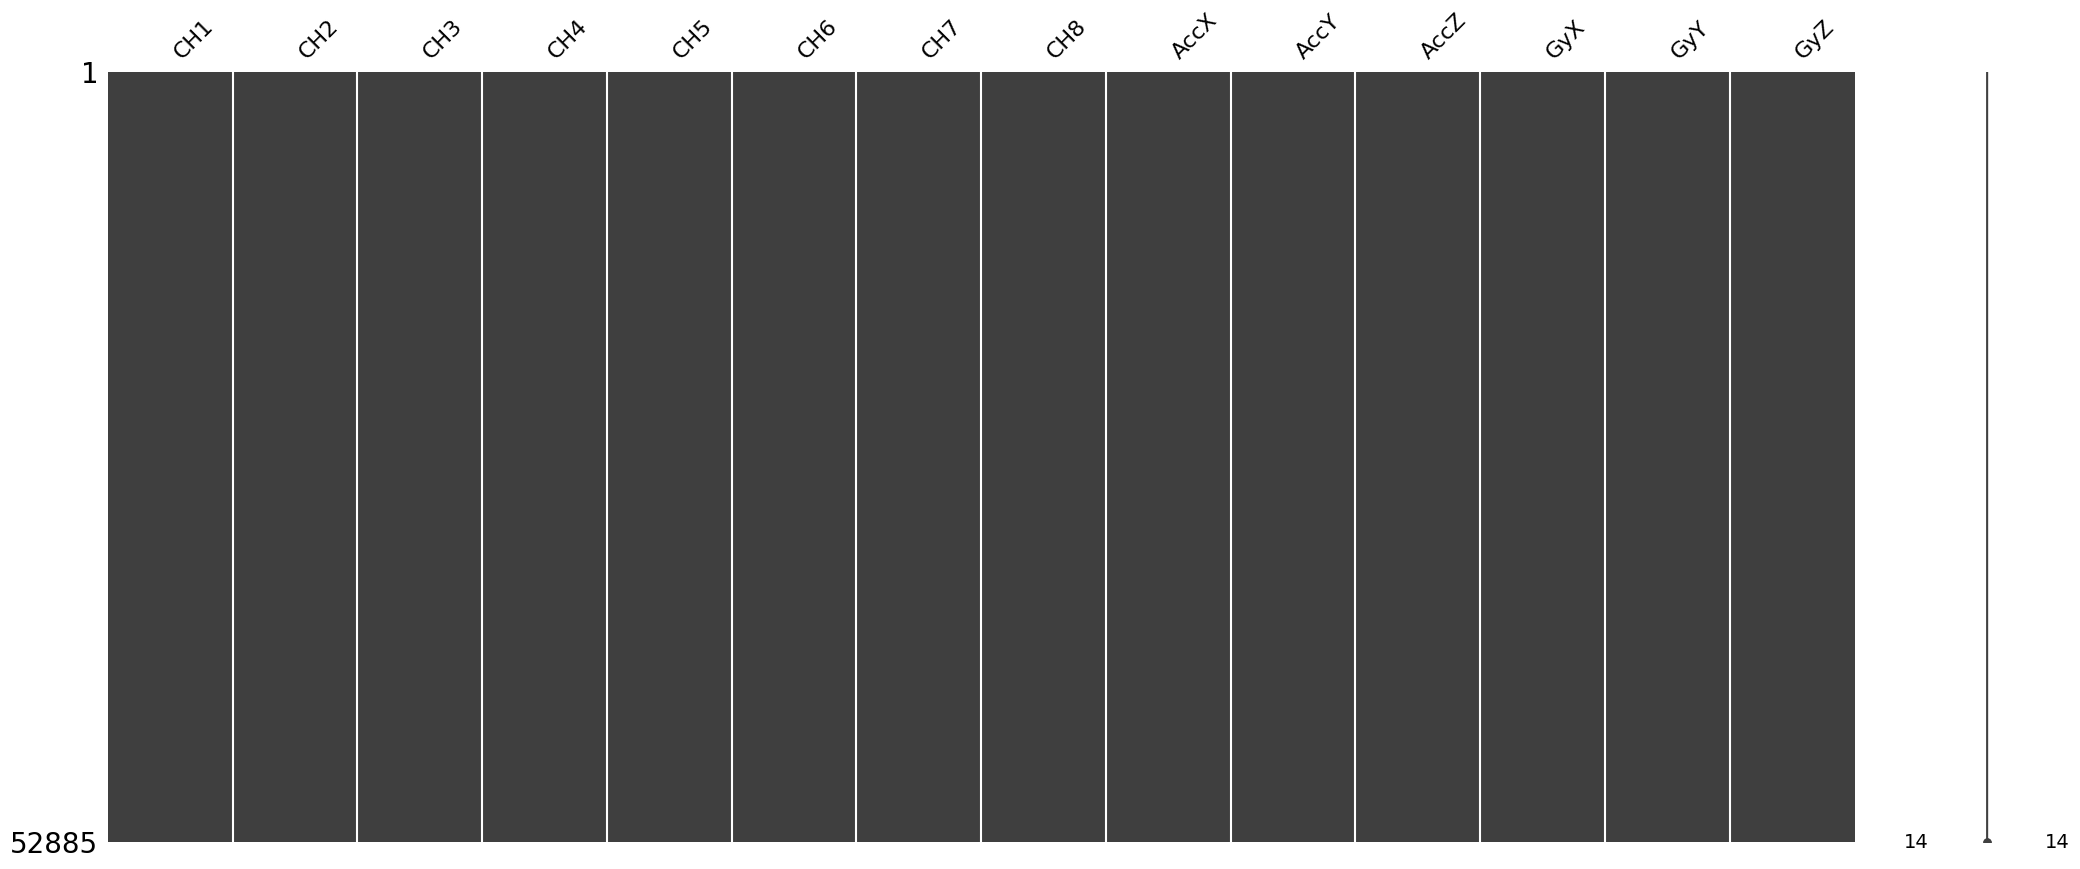

In [270]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

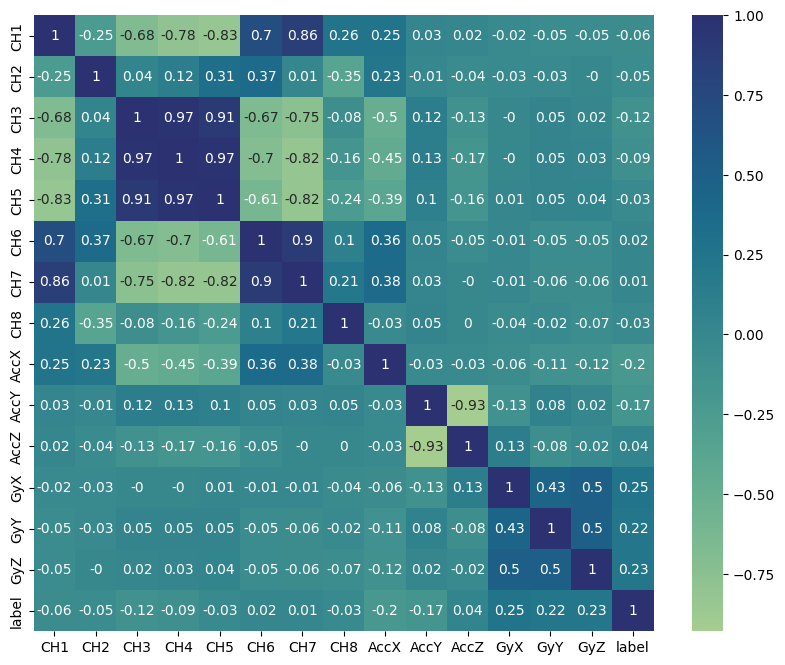

In [271]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=False, test_size=0.3)

In [37]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [38]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [40]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [277]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [278]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 350, 400, 450, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [10, 25, 50, 75, 100, 125,
                                                      150, 200, 250, 300, 350,
                                                      400, 500]})

In [279]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
4,True,100,0.451683,0.102957
5,True,125,0.448874,0.100006
2,True,50,0.446740,0.103039
11,True,400,0.445876,0.102284
12,True,500,0.444606,0.105393


In [280]:
random_forest_grid.best_score_

0.45168336296840966

In [281]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 100}

In [282]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=33))])


In [283]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [284]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.13      0.51      0.21      1806
           1       0.09      0.06      0.07      2672
           2       0.20      0.10      0.13      2418
           3       0.00      0.00      0.00      1833
           4       0.00      0.00      0.00      1773
           5       0.50      0.63      0.56      2682
           6       0.58      0.12      0.20      2682

    accuracy                           0.21     15866
   macro avg       0.21      0.20      0.17     15866
weighted avg       0.24      0.21      0.18     15866



In [285]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.2090003781671499


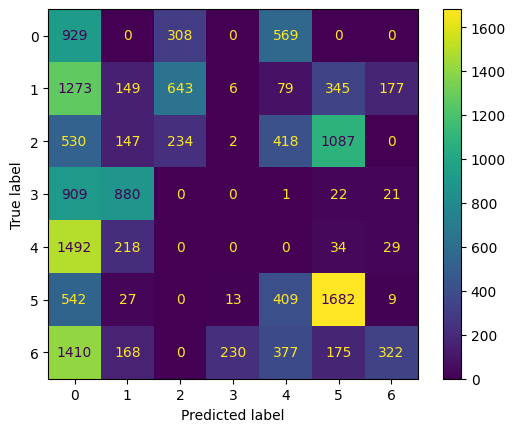

In [286]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [287]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [288]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [289]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
7,1,l2,saga,0.393531,0.061549,0.719484,0.054299
23,25,l2,saga,0.391998,0.058747,0.721738,0.053458
15,10,l2,saga,0.391997,0.058873,0.721636,0.053508
31,50,l2,saga,0.391944,0.058673,0.721762,0.053470
39,75,l2,saga,0.391944,0.058673,0.721776,0.053457


In [290]:
logistic_grid.best_params_

{'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}

In [291]:
logistic_grid.best_score_

0.39353055181591734

In [292]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=33, solver='saga'))])


In [293]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [ 0.79280499  0.55393234  1.72303163  1.41345562 -0.55794467 -1.0948814
 -2.83039852]
Coeficientes: [('CH1', 3.052931762300988), ('CH2', 0.07118922196675675), ('CH3', 1.2499178122200194), ('CH4', 1.4027847676382628), ('CH5', -1.6214672488601745), ('CH6', -0.3282929713566035), ('CH7', -0.2180790094582141), ('CH8', -1.3407529918432883), ('AccX', -0.3340063214727045), ('AccY', 2.5717307431468845), ('AccZ', 1.3778995148973916), ('GyX', -3.052189783213157), ('GyY', -0.7893875841354338), ('GyZ', -1.5070959820782612), ('TimeStamp', 5.6075278138838955), ('label', 1.7699764102602167)]
Accuracy de test: 0.22349678557922603


In [294]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [295]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1806
           1       0.45      0.18      0.26      2672
           2       0.11      0.02      0.03      2418
           3       0.00      0.00      0.00      1833
           4       0.00      0.00      0.00      1773
           5       0.18      0.70      0.29      2682
           6       0.90      0.42      0.57      2682

    accuracy                           0.22     15866
   macro avg       0.24      0.19      0.16     15866
weighted avg       0.28      0.22      0.19     15866



In [296]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.22349678557922603


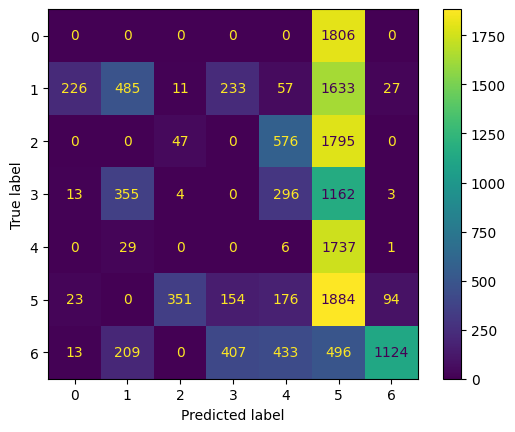

In [297]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [298]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [299]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [300]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
11,0,0.01,1,100,0.530633,0.132097,0.920583,0.012688
6,0,0.01,1,5,0.530633,0.132097,0.920583,0.012688
7,0,0.01,1,10,0.530633,0.132097,0.920583,0.012688
8,0,0.01,1,25,0.530633,0.132097,0.920583,0.012688
9,0,0.01,1,50,0.530633,0.132097,0.920583,0.012688


In [301]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.01,
 'classifier__max_depth': 1,
 'classifier__max_leaf_nodes': 5}

In [302]:
hist_gradient_grid.best_score_

0.530633246173425

In [303]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.01, max_depth=1,
                                                max_iter=1000, max_leaf_nodes=5,
                                                n_iter_no_change=5,
                                                random_state=3

In [304]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [305]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1806
           1       0.17      0.75      0.28      2672
           2       0.00      0.00      0.00      2418
           3       0.00      0.00      0.00      1833
           4       0.00      0.00      0.00      1773
           5       0.87      0.59      0.70      2682
           6       0.99      0.20      0.34      2682

    accuracy                           0.26     15866
   macro avg       0.29      0.22      0.19     15866
weighted avg       0.34      0.26      0.22     15866



In [306]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.2608723055590571


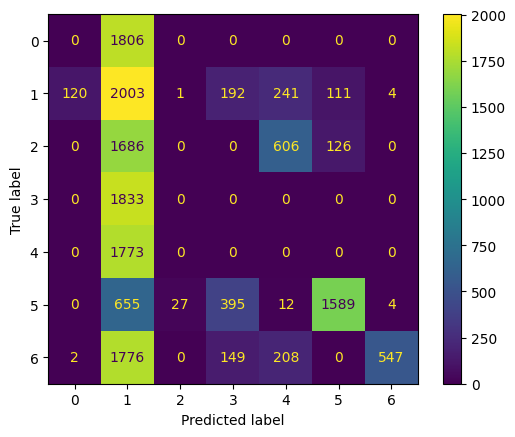

In [307]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [308]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [309]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callback...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9,
                                                       1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [310]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
1320,0.9,3,30,0.1,0.478718,0.090147
1098,0.7,9,76,0.1,0.473347,0.074637
498,0.3,13,76,0.1,0.472201,0.074879
468,0.3,11,76,0.1,0.471227,0.077923
678,0.5,3,76,0.1,0.471149,0.091172


In [311]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.9,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 30,
 'classifier__subsample': 0.1}

In [312]:
XGBoost_grid.best_score_

0.47871805429719333

In [313]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.9,
             

In [314]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [315]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1806
           1       0.17      0.73      0.27      2672
           2       0.40      0.12      0.19      2418
           3       0.00      0.00      0.00      1833
           4       0.00      0.00      0.00      1773
           5       0.88      0.57      0.69      2682
           6       0.99      0.21      0.34      2682

    accuracy                           0.27     15866
   macro avg       0.35      0.23      0.21     15866
weighted avg       0.41      0.27      0.25     15866



In [316]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.27341484936341864


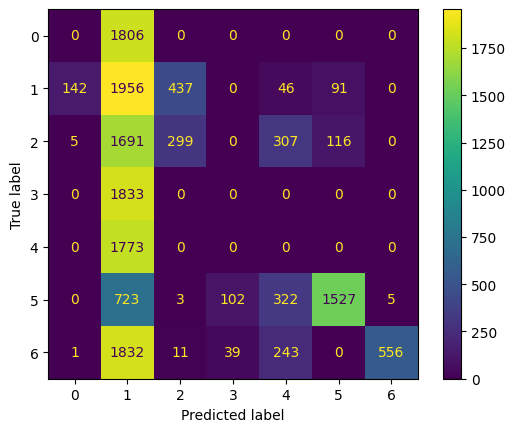

In [317]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [318]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [319]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 37019, number of used features: 14
[LightGBM] [Info] Start training from score -1.863450
[LightGBM] [Info] Start training from score -2.019954
[LightGBM] [Info] Start training from score -1.939958
[LightGBM] [Info] Start training from score -1.951681
[LightGBM] [Info] Start training from score -1.803306
[LightGBM] [Info] Start training from score -2.023830
[LightGBM] [Info] Start training from score -2.043649


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C0856C5CD0>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [320]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
133,gbdt,True,0.7,5,15,3,0.7,0.487446,0.076418,0.988634,0.001107
278,gbdt,True,0.1,25,123,3,0.3,0.487185,0.040927,0.994795,0.001433
53,gbdt,True,0.1,7,57,3,1,0.481860,0.051606,0.966212,0.005221
132,gbdt,True,0.1,50,38,5,0.9,0.475880,0.036456,0.987383,0.003978
465,gbdt,True,0.1,7,41,5,0.1,0.475323,0.039340,0.990298,0.002762


In [321]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.7,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 15,
 'classifier__num_leaves': 3,
 'classifier__subsample': 0.7}

In [322]:
light_grid.best_score_

0.487445754732023

In [323]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.7,
                                max_depth=5, n_estimators=15, num_leaves=3,
                                random_state=33, subsample=0.7))])


In [324]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [325]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1806
           1       0.16      0.66      0.26      2672
           2       0.52      0.19      0.28      2418
           3       0.00      0.00      0.00      1833
           4       0.00      0.00      0.00      1773
           5       0.68      0.63      0.65      2682
           6       0.94      0.21      0.35      2682

    accuracy                           0.28     15866
   macro avg       0.33      0.24      0.22     15866
weighted avg       0.38      0.28      0.26     15866



In [326]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.2826169166771713


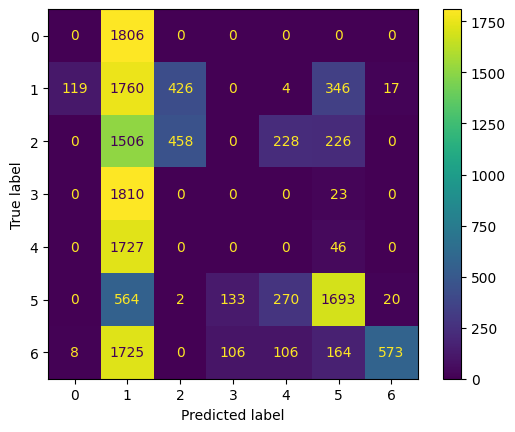

In [327]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [328]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [329]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [330]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
5,1,0.001,rbf,0.396804,0.047752
21,10,0.001,rbf,0.391985,0.030162
69,75,0.001,rbf,0.381071,0.004411
37,25,0.001,rbf,0.373654,0.015170
53,50,0.001,rbf,0.373441,0.007640


In [331]:
svm_grid.best_params_

{'classifier__C': 1, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}

In [332]:
svm_grid.best_score_

0.39680411736109084

In [333]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=1, gamma=0.001))])


In [334]:
modelo_final_svm = svm_grid.best_estimator_

In [335]:
y_test_pred = modelo_final_svm.predict(x_test)

In [336]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.11      0.08      0.09      1806
           1       0.14      0.06      0.08      2672
           2       0.20      0.72      0.32      2418
           3       0.00      0.00      0.00      1833
           4       0.00      0.00      0.00      1773
           5       0.65      0.70      0.68      2682
           6       0.80      0.18      0.29      2682

    accuracy                           0.28     15866
   macro avg       0.27      0.25      0.21     15866
weighted avg       0.31      0.28      0.24     15866



In [337]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.2774486322954746


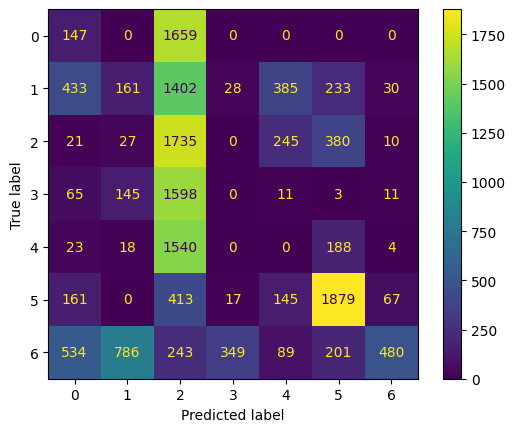

In [338]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [339]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [340]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [341]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
87,0.1,0.01,constant,log_loss,None,0.435153,0.061979
327,0.01,0.01,constant,log_loss,None,0.434127,0.072187
67,0.1,0.001,adaptive,log_loss,None,0.434065,0.100184
688,0.001,0.1,invscaling,modified_huber,l1,0.433673,0.074478
864,0.0001,0.01,adaptive,log_loss,l1,0.433562,0.068414


In [342]:
sgd_grid.best_params_

{'classifier__alpha': 0.1,
 'classifier__eta0': 0.01,
 'classifier__learning_rate': 'constant',
 'classifier__loss': 'log_loss',
 'classifier__penalty': None}

In [343]:
sgd_grid.best_score_

0.4351532943672874

In [344]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=0.1, eta0=0.01, learning_rate='constant',
                               loss='log_loss', penalty=None))])


In [345]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [346]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1806
           1       1.00      0.30      0.46      2672
           2       1.00      0.23      0.37      2418
           3       0.00      0.00      0.00      1833
           4       0.15      1.00      0.27      1773
           5       0.88      0.67      0.76      2682
           6       0.77      0.06      0.10      2682

    accuracy                           0.32     15866
   macro avg       0.54      0.32      0.28     15866
weighted avg       0.62      0.32      0.31     15866



In [347]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.32005546451531575


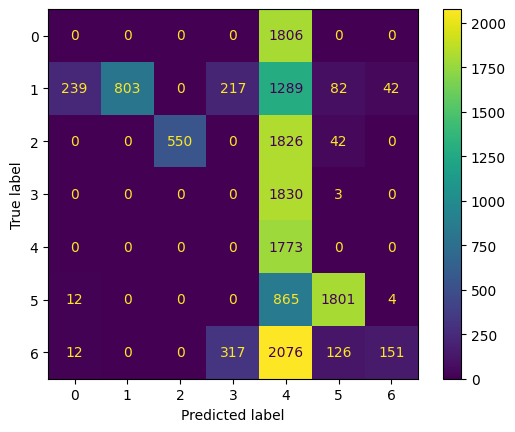

In [348]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

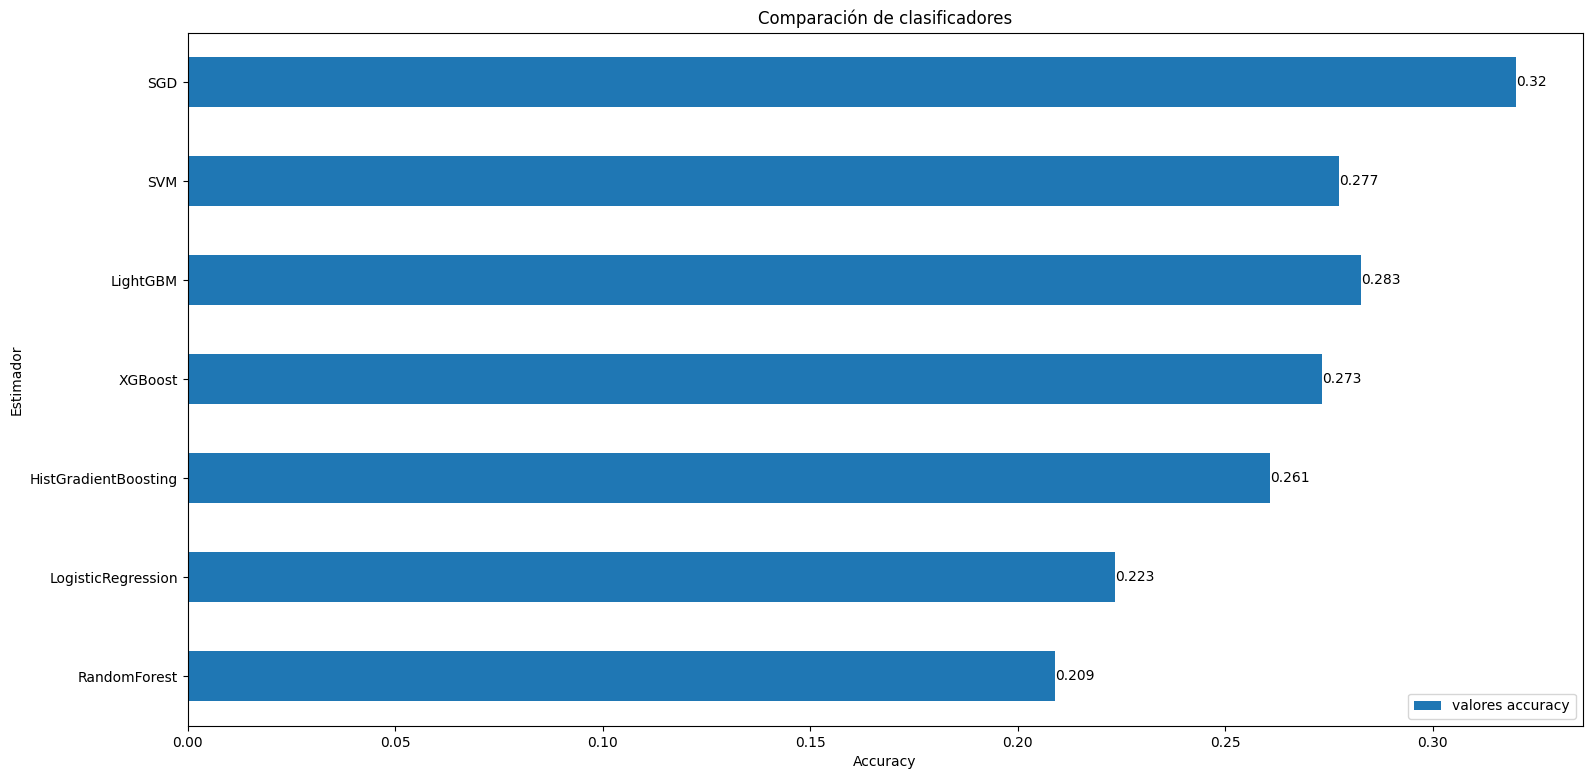

In [5]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo generalizacion.ipynb.

In [41]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [48]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.1,
        eta0 = 0.01,
        learning_rate = 'constant',
        loss = 'log_loss',
        penalty = None   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWA/modelo_SGD.pkl', 'wb'))

In [42]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 100
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWA/modelo_RF.pkl', 'wb'))

In [47]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 1,
        gamma = 0.001,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWA/modelo_SVM.pkl', 'wb'))

In [43]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 1,
        penalty = 'l2',
        solver = 'saga',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWA/modelo_LR.pkl', 'wb'))

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [44]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.01,
        max_depth = 1,
        max_leaf_nodes = 5         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWA/modelo_HIST.pkl', 'wb'))

In [45]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.9,
        max_depth = 3,
        n_estimators = 30,
        subsample = 0.1        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWA/modelo_XGB.pkl', 'wb'))

In [46]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.7,
        max_depth = 5,
        n_estimators = 15,
        num_leaves = 3,
        subsample = 0.7      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWA/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 37019, number of used features: 14
[LightGBM] [Info] Start training from score -1.863450
[LightGBM] [Info] Start training from score -2.019954
[LightGBM] [Info] Start training from score -1.939958
[LightGBM] [Info] Start training from score -1.951681
[LightGBM] [Info] Start training from score -1.803306
[LightGBM] [Info] Start training from score -2.023830
[LightGBM] [Info] Start training from score -2.043649


# DATOS 0.01 RWA SHUFFLE

In [49]:
path = "data_train_rwa.csv"

df = pd.read_csv(path)

In [50]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [380]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,10536.664923,4263.490413,7436.111139,11794.433869,4457.514961,8616.294682,13678.553942,4965.439639,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634,01:08.958213,4
1,10673.660915,4222.669175,7491.423311,11850.392593,4481.451889,8752.567658,13661.008614,4886.074993,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634,01:08.960366,4
2,10674.627895,4227.769973,7485.470363,11837.851692,4476.880669,8773.085499,13659.317271,4866.920212,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634,01:08.964712,4
3,10535.087438,4285.281235,7415.160516,11764.981423,4439.544186,8656.867029,13678.294259,4904.575401,52.924732,169.379896,181.465816,0.028320,0.016528,0.016150,01:08.970603,4
4,10455.772705,4327.317894,7368.955824,11719.944850,4410.664703,8576.230120,13688.925013,4937.993905,53.095644,170.258872,180.879832,0.025635,0.017554,0.019665,01:08.972413,4


In [381]:
print(df.shape)

(52885, 16)


Obtenemos el número de gestos realizados, `label`

In [382]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 7



0. Reposo
1. Puño
2. Palma
3. Flexión
4. Extensión
5. Pronación
6. Supinación

Observamos que tipos de datos tenemos en cada columna de la base de datos

In [383]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [51]:
X_df = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

In [385]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
0,10536.664923,4263.490413,7436.111139,11794.433869,4457.514961,8616.294682,13678.553942,4965.439639,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634
1,10673.660915,4222.669175,7491.423311,11850.392593,4481.451889,8752.567658,13661.008614,4886.074993,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634
2,10674.627895,4227.769973,7485.470363,11837.851692,4476.880669,8773.085499,13659.317271,4866.920212,52.753820,168.500920,182.051800,0.031006,0.015503,0.012634
3,10535.087438,4285.281235,7415.160516,11764.981423,4439.544186,8656.867029,13678.294259,4904.575401,52.924732,169.379896,181.465816,0.028320,0.016528,0.016150
4,10455.772705,4327.317894,7368.955824,11719.944850,4410.664703,8576.230120,13688.925013,4937.993905,53.095644,170.258872,180.879832,0.025635,0.017554,0.019665


In [386]:
y_df.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [387]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
count,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000,52885.000000
mean,7072.550257,7221.187163,9163.403223,14826.422186,12092.132332,8665.496163,9886.550148,5127.075567,42.005234,162.208502,176.783953,0.043154,0.016185,0.015324
std,5068.757324,3138.863602,3733.226884,4422.563540,7721.229240,2086.725776,4065.112968,9305.298888,17.183284,43.353122,31.203526,0.104057,0.025786,0.019678
min,43.792604,30.424074,866.994013,5558.301286,6.546027,5813.423923,4614.111467,6.744854,0.000000,0.335720,80.206560,0.000000,0.000000,0.000000
25%,2770.876645,6366.099664,6046.606230,10335.074983,3241.134594,6871.539686,6605.382017,1641.184101,31.466120,154.339640,164.975860,0.006348,0.003723,0.003784
50%,4196.465784,7606.555650,9850.110681,15926.581512,14754.842676,7874.840387,8889.861333,2806.061735,43.814512,169.675940,177.464644,0.014087,0.008130,0.008533
75%,11413.528817,8396.411802,11481.867958,18913.870943,19800.440825,10155.967743,13868.945564,5502.652817,54.539240,184.996980,190.490580,0.032129,0.016785,0.018701
max,29958.314069,14880.707441,15910.367696,21094.728955,23269.978628,13779.479405,17342.502960,91528.413685,78.131200,243.183360,257.695620,1.581173,0.357848,0.328612


Observamos si las salidas estan balanceadas

In [388]:
y_df.value_counts()

label
4    7872
2    7738
1    7583
5    7574
0    7549
6    7478
3    7091
Name: count, dtype: int64

Observamos si hay valores nulos

In [389]:
X_df.isnull().any()

CH1     False
CH2     False
CH3     False
CH4     False
CH5     False
CH6     False
CH7     False
CH8     False
AccX    False
AccY    False
AccZ    False
GyX     False
GyY     False
GyZ     False
dtype: bool

In [390]:
X_df.isnull().sum()

CH1     0
CH2     0
CH3     0
CH4     0
CH5     0
CH6     0
CH7     0
CH8     0
AccX    0
AccY    0
AccZ    0
GyX     0
GyY     0
GyZ     0
dtype: int64

In [391]:
X_df.isnull().sum() / len(X_df) * 100

CH1     0.0
CH2     0.0
CH3     0.0
CH4     0.0
CH5     0.0
CH6     0.0
CH7     0.0
CH8     0.0
AccX    0.0
AccY    0.0
AccZ    0.0
GyX     0.0
GyY     0.0
GyZ     0.0
dtype: float64

In [392]:
y_df.isnull().any()

False

In [393]:
y_df.isnull().sum()

0

In [394]:
y_df.isnull().sum() / len(y_df) * 100

0.0

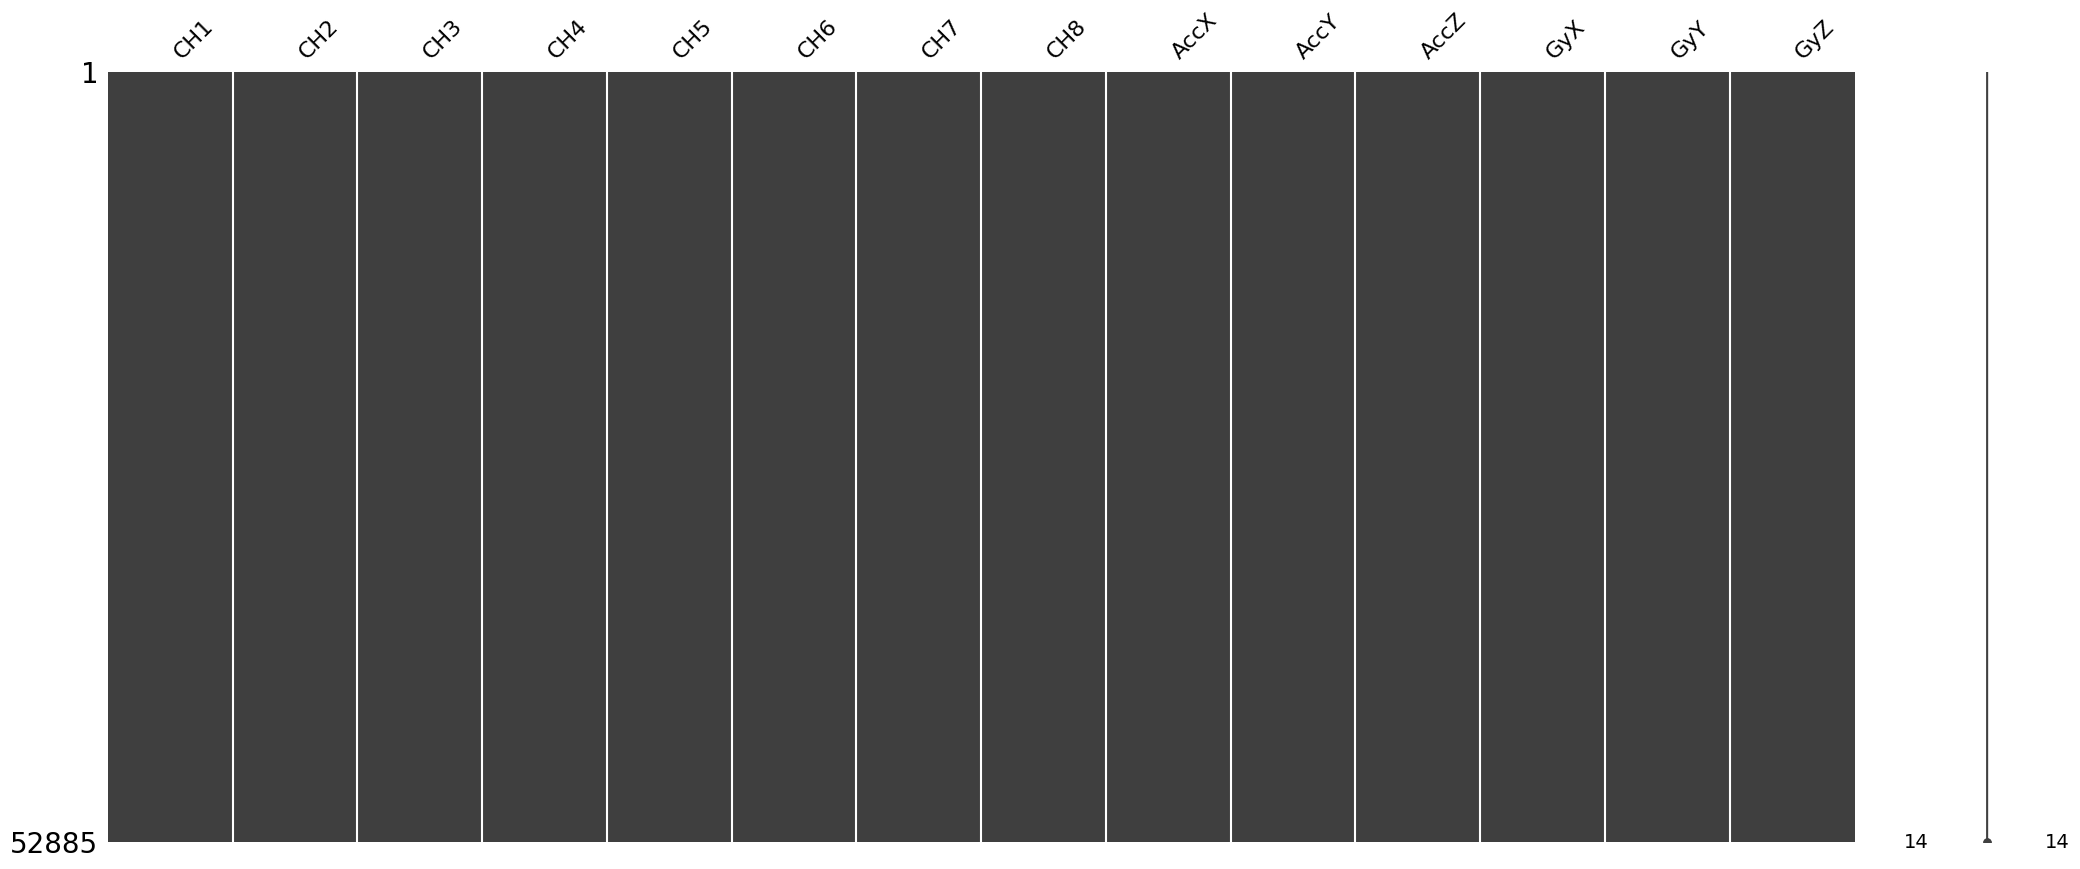

In [395]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

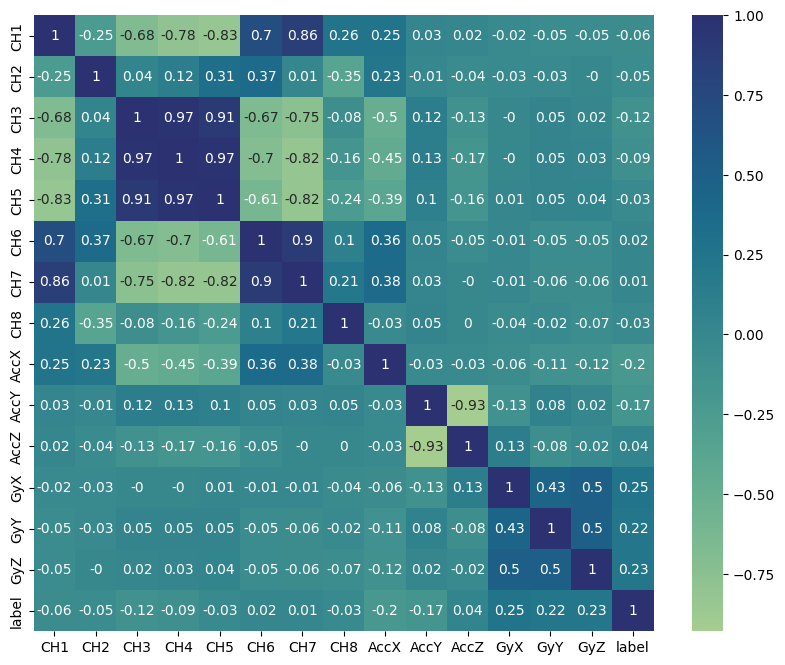

In [396]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=True, test_size=0.2)

In [53]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [54]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [56]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [402]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [403]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 350, 400, 450, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [10, 25, 50, 75, 100, 125,
                                                      150, 200, 250, 300, 350,
                                                      400, 500]})

In [404]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
4,True,100,0.999838,0.000132
3,True,75,0.999811,0.000076
7,True,200,0.999730,0.000076
2,True,50,0.999730,0.000076
6,True,150,0.999703,0.000153


In [405]:
random_forest_grid.best_score_

0.9998379254457049

In [406]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 100}

In [407]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=33))])


In [408]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [409]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2296
           2       1.00      1.00      1.00      2350
           3       1.00      1.00      1.00      2084
           4       1.00      1.00      1.00      2363
           5       1.00      1.00      1.00      2250
           6       1.00      1.00      1.00      2213

    accuracy                           1.00     15866
   macro avg       1.00      1.00      1.00     15866
weighted avg       1.00      1.00      1.00     15866



In [410]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.9994327492751797


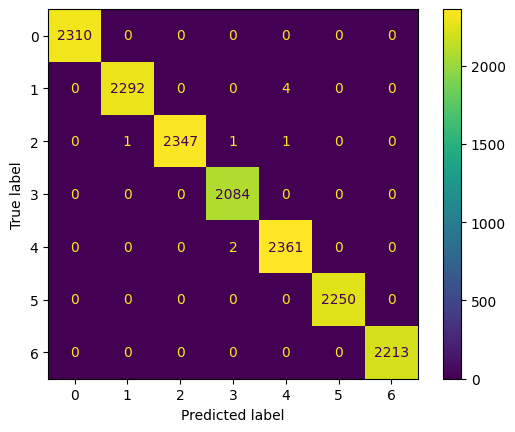

In [411]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [412]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [413]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [414]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
12,10,l2,newton-cg,0.662921,0.004152,0.663707,0.003053
20,25,l2,newton-cg,0.662483,0.004045,0.663409,0.003071
28,50,l2,newton-cg,0.660939,0.003979,0.662306,0.002925
36,75,l2,newton-cg,0.660452,0.004235,0.661342,0.003042
44,100,l2,newton-cg,0.659802,0.004069,0.661076,0.003093


In [415]:
logistic_grid.best_params_

{'classifier__C': 10,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [416]:
logistic_grid.best_score_

0.6629213345909536

In [417]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced',
                                    random_state=33, solver='newton-cg'))])


In [418]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [-1.61675078 -1.61463699 -0.23289569  0.72957026  2.15001896 -0.30478322
  0.88947746]
Coeficientes: [('CH1', 2.7585945791704933), ('CH2', 2.7912427706921434), ('CH3', -3.3073978926397496), ('CH4', 33.862368443755294), ('CH5', -39.65299826908975), ('CH6', 0.9185548219129233), ('CH7', -8.401178077112359), ('CH8', -0.9977847831309516), ('AccX', -0.09611773583087613), ('AccY', 4.8104696965781395), ('AccZ', 2.926109477637025), ('GyX', -3.162078456879256), ('GyY', -1.1186058289864198), ('GyZ', -1.6469942233086914), ('TimeStamp', 6.196522180875864), ('label', 3.606693363747036)]
Accuracy de test: 0.6571284507752426


In [419]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [420]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.85      0.72      2310
           1       0.71      0.62      0.67      2296
           2       0.59      0.51      0.55      2350
           3       0.40      0.45      0.42      2084
           4       0.61      0.56      0.58      2363
           5       0.89      0.79      0.84      2250
           6       0.81      0.81      0.81      2213

    accuracy                           0.66     15866
   macro avg       0.66      0.66      0.66     15866
weighted avg       0.67      0.66      0.66     15866



In [421]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.6571284507752426


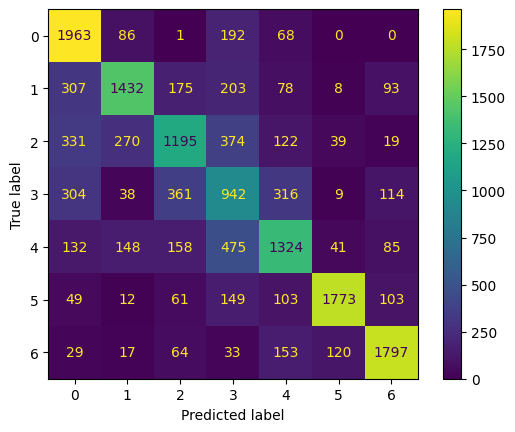

In [422]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [423]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [424]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [425]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
155,0,0.3,10,100,0.999810,0.000154,0.999945,0.000077
214,0,0.5,10,75,0.999790,0.000075,0.999987,0.000018
506,1,0.3,7,25,0.999784,0.000100,0.999987,0.000018
158,0,0.3,25,25,0.999758,0.000063,1.000000,0.000000
122,0,0.3,None,25,0.999758,0.000063,1.000000,0.000000


In [426]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.3,
 'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 100}

In [427]:
hist_gradient_grid.best_score_

0.9998102041248765

In [428]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.3, max_depth=10,
                                                max_iter=1000,
                                                max_leaf_nodes=100,
                                                n_iter_no_change=5,
            

In [429]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [430]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2296
           2       1.00      1.00      1.00      2350
           3       1.00      1.00      1.00      2084
           4       1.00      1.00      1.00      2363
           5       1.00      1.00      1.00      2250
           6       1.00      1.00      1.00      2213

    accuracy                           1.00     15866
   macro avg       1.00      1.00      1.00     15866
weighted avg       1.00      1.00      1.00     15866



In [431]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.9996218328501197


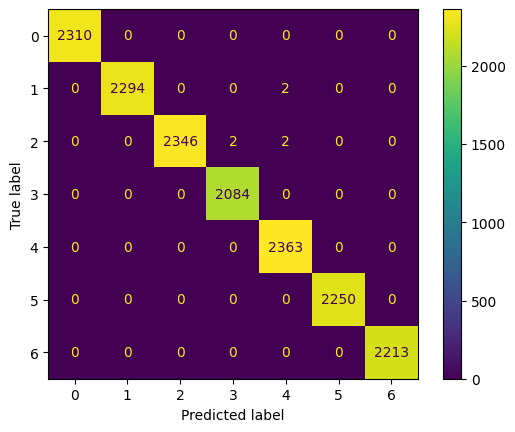

In [432]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [433]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [434]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callback...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9,
                                                       1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [435]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
307,0.1,100,401,0.3,0.999816,0.000098
217,0.1,25,401,0.3,0.999816,0.000098
253,0.1,50,226,0.3,0.999816,0.000098
247,0.1,50,401,0.3,0.999816,0.000098
313,0.1,100,226,0.3,0.999816,0.000098


In [436]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 25,
 'classifier__n_estimators': 401,
 'classifier__subsample': 0.3}

In [437]:
XGBoost_grid.best_score_

0.9998162295770291

In [438]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
             

In [439]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [440]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2296
           2       1.00      1.00      1.00      2350
           3       1.00      1.00      1.00      2084
           4       1.00      1.00      1.00      2363
           5       1.00      1.00      1.00      2250
           6       1.00      1.00      1.00      2213

    accuracy                           1.00     15866
   macro avg       1.00      1.00      1.00     15866
weighted avg       1.00      1.00      1.00     15866



In [441]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.9994327492751797


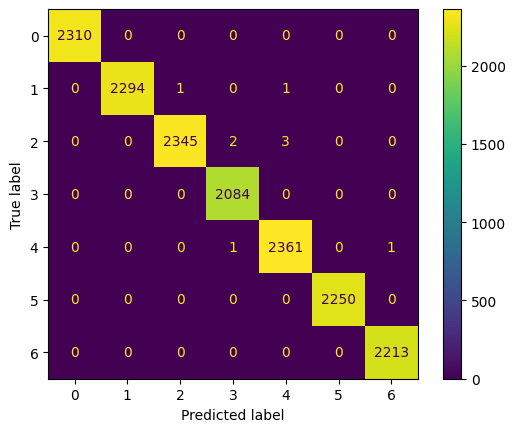

In [442]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [443]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [444]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 37019, number of used features: 14
[LightGBM] [Info] Start training from score -1.955301
[LightGBM] [Info] Start training from score -1.946180
[LightGBM] [Info] Start training from score -1.927257
[LightGBM] [Info] Start training from score -2.000594
[LightGBM] [Info] Start training from score -1.905048
[LightGBM] [Info] Start training from score -1.939206
[LightGBM] [Info] Start training from score -1.950350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C06AB77110>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [445]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
260,gbdt,True,0.3,100,299,25,0.5,0.999759,0.000114,1.0,0.0
225,gbdt,True,0.3,25,432,25,0.5,0.999759,0.000114,1.0,0.0
487,gbdt,True,0.3,10,35,25,0.3,0.999733,0.000033,1.0,0.0
479,gbdt,True,0.3,25,85,25,0.7,0.999732,0.000100,1.0,0.0
336,gbdt,True,0.3,50,445,7,0.7,0.999707,0.000131,1.0,0.0


In [446]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.3,
 'classifier__max_depth': 25,
 'classifier__n_estimators': 432,
 'classifier__num_leaves': 25,
 'classifier__subsample': 0.5}

In [447]:
light_grid.best_score_

0.9997591476644906

In [448]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.3,
                                max_depth=25, n_estimators=432, num_leaves=25,
                                random_state=33, subsample=0.5))])


In [449]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [450]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2296
           2       1.00      1.00      1.00      2350
           3       1.00      1.00      1.00      2084
           4       1.00      1.00      1.00      2363
           5       1.00      1.00      1.00      2250
           6       1.00      1.00      1.00      2213

    accuracy                           1.00     15866
   macro avg       1.00      1.00      1.00     15866
weighted avg       1.00      1.00      1.00     15866



In [451]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.9997478885667465


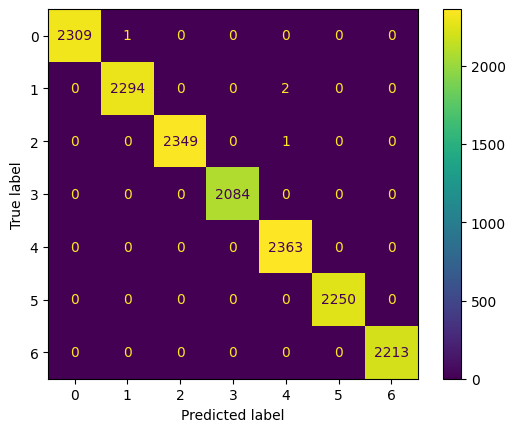

In [452]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [453]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [454]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [455]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
153,200,0.1,rbf,0.994423,0.000438
137,175,0.1,rbf,0.994233,0.000399
121,150,0.1,rbf,0.993991,0.000486
105,125,0.1,rbf,0.993884,0.000340
147,200,auto,rbf,0.993829,0.000135


In [456]:
svm_grid.best_params_

{'classifier__C': 200, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}

In [457]:
svm_grid.best_score_

0.9944230196793757

In [458]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=200, gamma=0.1))])


In [459]:
modelo_final_svm = svm_grid.best_estimator_

In [460]:
y_test_pred = modelo_final_svm.predict(x_test)

In [461]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      0.99      1.00      2296
           2       0.99      1.00      1.00      2350
           3       1.00      1.00      1.00      2084
           4       1.00      1.00      1.00      2363
           5       1.00      1.00      1.00      2250
           6       1.00      1.00      1.00      2213

    accuracy                           1.00     15866
   macro avg       1.00      1.00      1.00     15866
weighted avg       1.00      1.00      1.00     15866



In [462]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.9972898020925249


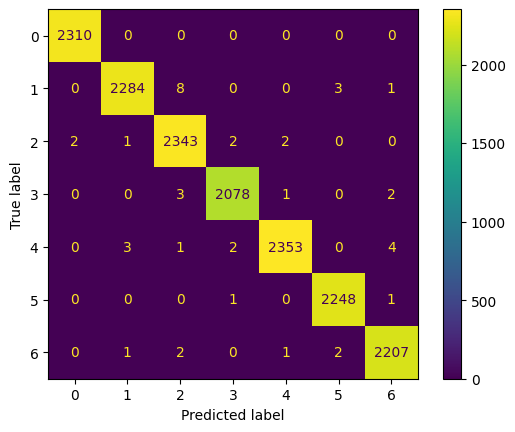

In [463]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [464]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [465]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [466]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
1189,0.00001,0.1,adaptive,modified_huber,l2,0.640309,0.003579
1190,0.00001,0.1,adaptive,modified_huber,elasticnet,0.640184,0.004192
471,0.01,0.1,adaptive,modified_huber,None,0.639228,0.003212
1184,0.00001,0.1,adaptive,log_loss,l1,0.639192,0.002633
707,0.001,0.1,adaptive,log_loss,None,0.638641,0.004409


In [467]:
sgd_grid.best_params_

{'classifier__alpha': 1e-05,
 'classifier__eta0': 0.1,
 'classifier__learning_rate': 'adaptive',
 'classifier__loss': 'modified_huber',
 'classifier__penalty': 'l2'}

In [468]:
sgd_grid.best_score_

0.6403092390844766

In [469]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(alpha=1e-05, eta0=0.1, learning_rate='adaptive',
                               loss='modified_huber'))])


In [470]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [471]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.59      0.88      0.71      2310
           1       0.69      0.62      0.65      2296
           2       0.54      0.45      0.49      2350
           3       0.49      0.39      0.43      2084
           4       0.48      0.53      0.51      2363
           5       0.89      0.78      0.83      2250
           6       0.78      0.77      0.78      2213

    accuracy                           0.63     15866
   macro avg       0.64      0.63      0.63     15866
weighted avg       0.64      0.63      0.63     15866



In [472]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.6338711710576075


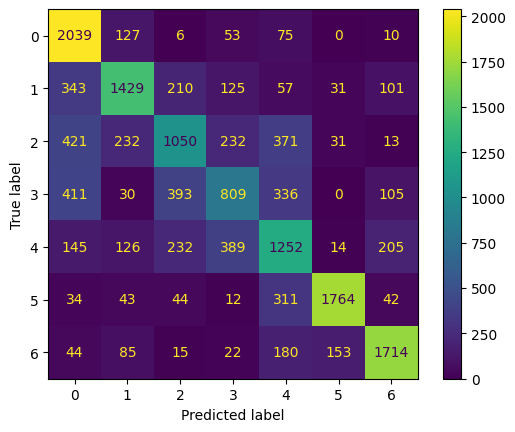

In [473]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

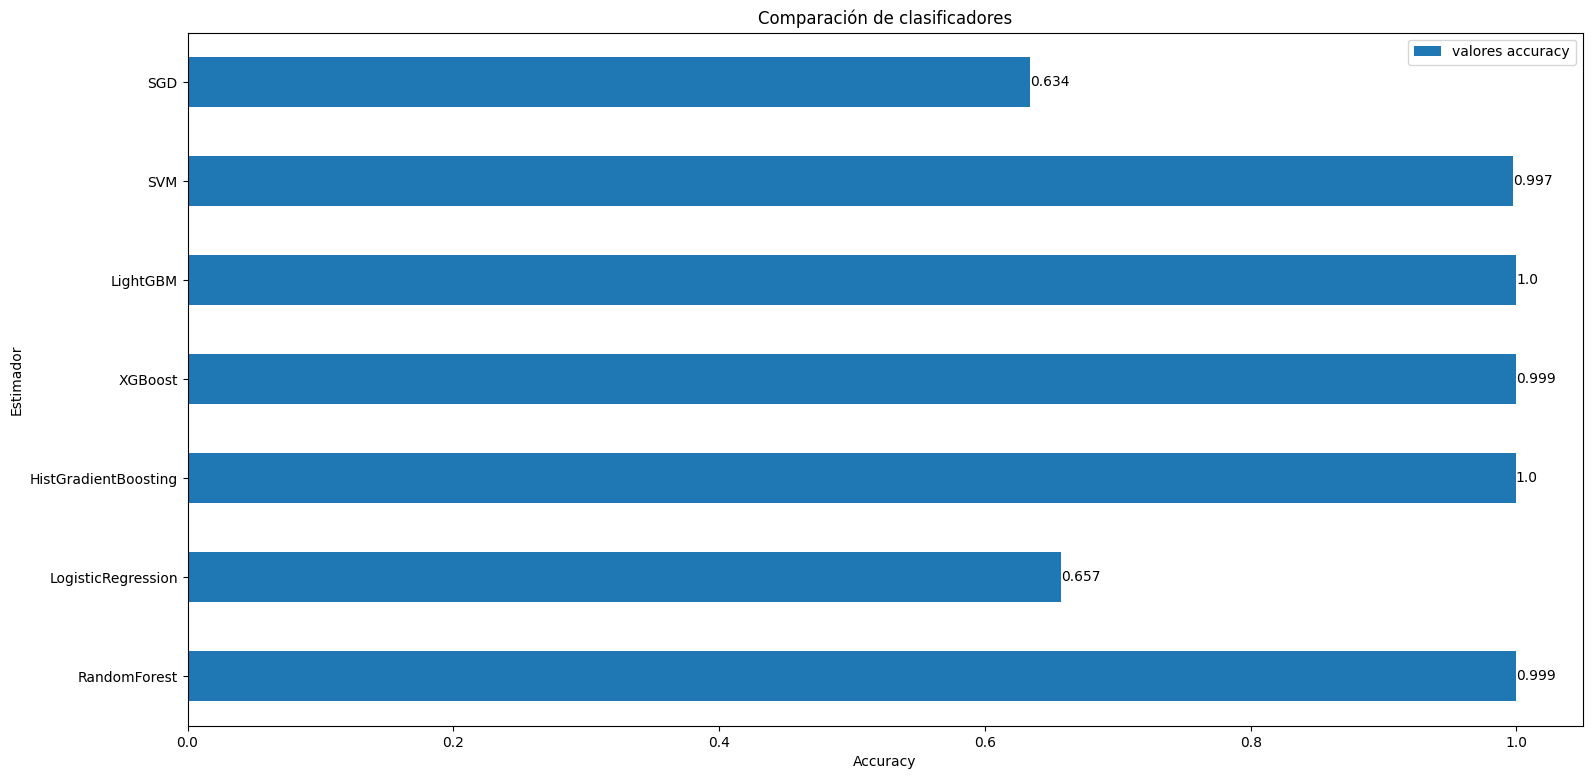

In [6]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo generalizacion.ipynb.

In [57]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [64]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 1e-05,
        eta0 = 0.1,
        learning_rate = 'adaptive',
        loss = 'modified_huber',
        penalty = 'l2'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWAs/modelo_SGD.pkl', 'wb'))

In [58]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 100
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWAs/modelo_RF.pkl', 'wb'))

In [63]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 200,
        gamma = 0.1,
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWAs/modelo_SVM.pkl', 'wb'))

In [59]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 10,
        penalty = 'l2',
        solver = 'newton-cg',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWAs/modelo_LR.pkl', 'wb'))

In [60]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.3,
        max_depth = 10,
        max_leaf_nodes = 100         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWAs/modelo_HIST.pkl', 'wb'))

In [61]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.1,
        max_depth = 25,
        n_estimators = 401,
        subsample = 0.3        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWAs/modelo_XGB.pkl', 'wb'))

In [62]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.3,
        max_depth = 25,
        n_estimators = 432,
        num_leaves = 25,
        subsample = 0.5      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/RWAs/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 37019, number of used features: 14
[LightGBM] [Info] Start training from score -1.955301
[LightGBM] [Info] Start training from score -1.946180
[LightGBM] [Info] Start training from score -1.927257
[LightGBM] [Info] Start training from score -2.000594
[LightGBM] [Info] Start training from score -1.905048
[LightGBM] [Info] Start training from score -1.939206
[LightGBM] [Info] Start training from score -1.950350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p